In [4]:
import numpy as np
from pymatgen import Composition, Element
with open("elements_list_main.txt", "r") as text_file:
    a=text_file.read()
main_group_list=a.split()
#load vectors(from SVD_20)
F=np.loadtxt('SVD_main_group.txt')



with open("formation_energy_dataset.txt", "r") as text_file:
    diction=text_file.read()
di=diction.split()
formation_dict={}
for i in range(len(di)):
    if i%2==0:
        formation_dict[di[i]]=di[i+1]
#build input vector(20vectors*4elements=80vectors)
#vector_input.shape=[5628,20]
vector_input=np.zeros((len(formation_dict),F.shape[1]*4))

formula_number=0
test_string_list=[]
for formula in formation_dict:
    vector=np.zeros((F.shape[1]*4))
    
    compound=Composition(formula)
    element_list=[]
    for element in compound:
        element_list.append(str(element))
    
    #sort element_list by the number of elements
    element_list_sorted=sorted(element_list,key=lambda s: compound[s])
    #build vector
    #test sort result
    formula_string=""
    element_order=0
    for element in element_list_sorted:
        formula_string+=str(element)+str(int(compound[element]))
        for j in range(len(main_group_list)):
            if str(element)==main_group_list[j]:
                #print(j)
                #print(F[j,:])
                vector[element_order*F.shape[1]:(element_order+1)*F.shape[1]]=F[j,:]
                #print(len(vector))
        element_order+=1
    #print(vector)
    vector_input[formula_number,:]=vector
    test_string_list.append(formula_string)
    formula_number+=1

#build success, input vector=vector_input 5628*80
#build formula and energy list
formula_list=[]
energy_list=[]
for formula in formation_dict:
    energy_list.append(formation_dict[formula])

for formula in test_string_list:
    formula_list.append(formula)
#build success, energy list=energy_list 5628
#build success, formula list=formula_list 5628
print(len(energy_list))
print(len(formula_list))
##store the dataset in file
#1.store the formula_list and energy_list to formation_energy_formula.txt

with open("FE_TRUE.txt", "w") as text_file:
    for i in range(len(formula_list)):
        text_file.write(formula_list[i]+" "+energy_list[i]+"\n")
        
#2. store the vector_input in SVD_20_INPUT.txt
np.savetxt("SVD_20_INPUT.txt",vector_input)
#build index number list
index_list=list(range(len(formula_list)))
#shuffle index_list
np.random.shuffle(index_list)

split_percent=[0.8,0.1,0.1]
boundry1=int(len(index_list)*split_percent[0])
boundry2=int(len(index_list)*(split_percent[1]+split_percent[0]))

#build split-index matrix
traning_index=index_list[:boundry1]
validation_index=index_list[boundry1:boundry2]
test_index=index_list[boundry2:]

#test split lenth
print(len(traning_index))
print(len(validation_index))
print(len(test_index))
training_x=vector_input[traning_index,:]
validation_x=vector_input[validation_index,:]
test_x=vector_input[test_index,:]

#trasform energy_list(string list) to numpy, dtype=np.double
energy_array=np.array(energy_list,dtype=np.double)

training_y=energy_array[traning_index]
validation_y=energy_array[validation_index]
test_y=energy_array[test_index]

#training_x
#training_y
#validation_x
#validation_y
#test_x
#test_y

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae', 'acc'])

history_1=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
evaluation=model.evaluate(validation_x, validation_y)

5628
5628
4502
563
563
Train on 4502 samples, validate on 563 samples
Epoch 1/1000
4502/4502 [==============================] - 1s 224us/step - loss: 7.8663 - mean_absolute_error: 7.8663 - acc: 0.0000e+00 - val_loss: 8.0358 - val_mean_absolute_error: 8.0358 - val_acc: 0.0000e+00
Epoch 2/1000
4502/4502 [==============================] - 0s 62us/step - loss: 7.4306 - mean_absolute_error: 7.4306 - acc: 0.0000e+00 - val_loss: 7.5357 - val_mean_absolute_error: 7.5357 - val_acc: 0.0000e+00
Epoch 3/1000
4502/4502 [==============================] - 0s 60us/step - loss: 6.8580 - mean_absolute_error: 6.8580 - acc: 0.0000e+00 - val_loss: 6.9315 - val_mean_absolute_error: 6.9315 - val_acc: 0.0000e+00
Epoch 4/1000
4502/4502 [==============================] - 0s 77us/step - loss: 6.2031 - mean_absolute_error: 6.2031 - acc: 0.0000e+00 - val_loss: 6.2784 - val_mean_absolute_error: 6.2784 - val_acc: 0.0000e+00
Epoch 5/1000
4502/4502 [==============================] - 0s 87us/step - loss: 5.5810 - mean_

Epoch 40/1000
4502/4502 [==============================] - 0s 97us/step - loss: 3.4771 - mean_absolute_error: 3.4771 - acc: 0.0000e+00 - val_loss: 3.6667 - val_mean_absolute_error: 3.6667 - val_acc: 0.0000e+00
Epoch 41/1000
4502/4502 [==============================] - 0s 82us/step - loss: 3.4610 - mean_absolute_error: 3.4610 - acc: 0.0000e+00 - val_loss: 3.6474 - val_mean_absolute_error: 3.6474 - val_acc: 0.0000e+00
Epoch 42/1000
4502/4502 [==============================] - 0s 47us/step - loss: 3.4475 - mean_absolute_error: 3.4475 - acc: 0.0000e+00 - val_loss: 3.6283 - val_mean_absolute_error: 3.6283 - val_acc: 0.0000e+00
Epoch 43/1000
4502/4502 [==============================] - 0s 66us/step - loss: 3.4315 - mean_absolute_error: 3.4315 - acc: 0.0000e+00 - val_loss: 3.6189 - val_mean_absolute_error: 3.6189 - val_acc: 0.0000e+00
Epoch 44/1000
4502/4502 [==============================] - 0s 50us/step - loss: 3.4204 - mean_absolute_error: 3.4204 - acc: 0.0000e+00 - val_loss: 3.6040 - val_

4502/4502 [==============================] - 0s 66us/step - loss: 3.0089 - mean_absolute_error: 3.0089 - acc: 0.0000e+00 - val_loss: 3.1959 - val_mean_absolute_error: 3.1959 - val_acc: 0.0000e+00
Epoch 80/1000
4502/4502 [==============================] - 0s 56us/step - loss: 2.9966 - mean_absolute_error: 2.9966 - acc: 0.0000e+00 - val_loss: 3.1825 - val_mean_absolute_error: 3.1825 - val_acc: 0.0000e+00
Epoch 81/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.9948 - mean_absolute_error: 2.9948 - acc: 0.0000e+00 - val_loss: 3.1728 - val_mean_absolute_error: 3.1728 - val_acc: 0.0000e+00
Epoch 82/1000
4502/4502 [==============================] - 0s 45us/step - loss: 2.9806 - mean_absolute_error: 2.9806 - acc: 0.0000e+00 - val_loss: 3.1653 - val_mean_absolute_error: 3.1653 - val_acc: 0.0000e+00
Epoch 83/1000
4502/4502 [==============================] - 0s 61us/step - loss: 2.9720 - mean_absolute_error: 2.9720 - acc: 0.0000e+00 - val_loss: 3.1563 - val_mean_absolute_

Epoch 118/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.6767 - mean_absolute_error: 2.6767 - acc: 0.0000e+00 - val_loss: 2.9064 - val_mean_absolute_error: 2.9064 - val_acc: 0.0000e+00
Epoch 119/1000
4502/4502 [==============================] - 0s 47us/step - loss: 2.6649 - mean_absolute_error: 2.6649 - acc: 0.0000e+00 - val_loss: 2.8974 - val_mean_absolute_error: 2.8974 - val_acc: 0.0000e+00
Epoch 120/1000
4502/4502 [==============================] - 0s 43us/step - loss: 2.6570 - mean_absolute_error: 2.6570 - acc: 0.0000e+00 - val_loss: 2.8864 - val_mean_absolute_error: 2.8864 - val_acc: 0.0000e+00
Epoch 121/1000
4502/4502 [==============================] - 0s 45us/step - loss: 2.6509 - mean_absolute_error: 2.6509 - acc: 0.0000e+00 - val_loss: 2.8819 - val_mean_absolute_error: 2.8819 - val_acc: 0.0000e+00
Epoch 122/1000
4502/4502 [==============================] - 0s 70us/step - loss: 2.6402 - mean_absolute_error: 2.6402 - acc: 0.0000e+00 - val_loss: 2.8753 -

Epoch 157/1000
4502/4502 [==============================] - 0s 48us/step - loss: 2.3523 - mean_absolute_error: 2.3523 - acc: 0.0000e+00 - val_loss: 2.5972 - val_mean_absolute_error: 2.5972 - val_acc: 0.0000e+00
Epoch 158/1000
4502/4502 [==============================] - 0s 66us/step - loss: 2.3437 - mean_absolute_error: 2.3437 - acc: 0.0000e+00 - val_loss: 2.5723 - val_mean_absolute_error: 2.5723 - val_acc: 0.0000e+00
Epoch 159/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.3334 - mean_absolute_error: 2.3334 - acc: 0.0000e+00 - val_loss: 2.5792 - val_mean_absolute_error: 2.5792 - val_acc: 0.0000e+00
Epoch 160/1000
4502/4502 [==============================] - 0s 69us/step - loss: 2.3322 - mean_absolute_error: 2.3322 - acc: 0.0000e+00 - val_loss: 2.5666 - val_mean_absolute_error: 2.5666 - val_acc: 0.0000e+00
Epoch 161/1000
4502/4502 [==============================] - 0s 64us/step - loss: 2.3218 - mean_absolute_error: 2.3218 - acc: 0.0000e+00 - val_loss: 2.5616 -

Epoch 196/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.1445 - mean_absolute_error: 2.1445 - acc: 0.0000e+00 - val_loss: 2.3589 - val_mean_absolute_error: 2.3589 - val_acc: 0.0000e+00
Epoch 197/1000
4502/4502 [==============================] - 0s 62us/step - loss: 2.1386 - mean_absolute_error: 2.1386 - acc: 0.0000e+00 - val_loss: 2.3625 - val_mean_absolute_error: 2.3625 - val_acc: 0.0000e+00
Epoch 198/1000
4502/4502 [==============================] - 0s 97us/step - loss: 2.1373 - mean_absolute_error: 2.1373 - acc: 0.0000e+00 - val_loss: 2.3541 - val_mean_absolute_error: 2.3541 - val_acc: 0.0000e+00
Epoch 199/1000
4502/4502 [==============================] - 0s 65us/step - loss: 2.1299 - mean_absolute_error: 2.1299 - acc: 0.0000e+00 - val_loss: 2.3535 - val_mean_absolute_error: 2.3535 - val_acc: 0.0000e+00
Epoch 200/1000
4502/4502 [==============================] - 0s 43us/step - loss: 2.1273 - mean_absolute_error: 2.1273 - acc: 0.0000e+00 - val_loss: 2.3557 -

Epoch 235/1000
4502/4502 [==============================] - 0s 64us/step - loss: 2.0168 - mean_absolute_error: 2.0168 - acc: 0.0000e+00 - val_loss: 2.2444 - val_mean_absolute_error: 2.2444 - val_acc: 0.0000e+00
Epoch 236/1000
4502/4502 [==============================] - 0s 50us/step - loss: 2.0109 - mean_absolute_error: 2.0109 - acc: 0.0000e+00 - val_loss: 2.2408 - val_mean_absolute_error: 2.2408 - val_acc: 0.0000e+00
Epoch 237/1000
4502/4502 [==============================] - 0s 68us/step - loss: 2.0109 - mean_absolute_error: 2.0109 - acc: 0.0000e+00 - val_loss: 2.2238 - val_mean_absolute_error: 2.2238 - val_acc: 0.0000e+00
Epoch 238/1000
4502/4502 [==============================] - 0s 66us/step - loss: 2.0064 - mean_absolute_error: 2.0064 - acc: 0.0000e+00 - val_loss: 2.2250 - val_mean_absolute_error: 2.2250 - val_acc: 0.0000e+00
Epoch 239/1000
4502/4502 [==============================] - 0s 62us/step - loss: 2.0048 - mean_absolute_error: 2.0048 - acc: 0.0000e+00 - val_loss: 2.2366 -

Epoch 274/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.9181 - mean_absolute_error: 1.9181 - acc: 0.0000e+00 - val_loss: 2.1595 - val_mean_absolute_error: 2.1595 - val_acc: 0.0000e+00
Epoch 275/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.9156 - mean_absolute_error: 1.9156 - acc: 0.0000e+00 - val_loss: 2.1591 - val_mean_absolute_error: 2.1591 - val_acc: 0.0000e+00
Epoch 276/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.9134 - mean_absolute_error: 1.9134 - acc: 0.0000e+00 - val_loss: 2.1505 - val_mean_absolute_error: 2.1505 - val_acc: 0.0000e+00
Epoch 277/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.9104 - mean_absolute_error: 1.9104 - acc: 0.0000e+00 - val_loss: 2.1585 - val_mean_absolute_error: 2.1585 - val_acc: 0.0000e+00
Epoch 278/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.9087 - mean_absolute_error: 1.9087 - acc: 0.0000e+00 - val_loss: 2.1644 -

4502/4502 [==============================] - 0s 50us/step - loss: 1.8477 - mean_absolute_error: 1.8477 - acc: 0.0000e+00 - val_loss: 2.0728 - val_mean_absolute_error: 2.0728 - val_acc: 0.0000e+00
Epoch 313/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8435 - mean_absolute_error: 1.8435 - acc: 0.0000e+00 - val_loss: 2.0844 - val_mean_absolute_error: 2.0844 - val_acc: 0.0000e+00
Epoch 314/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.8412 - mean_absolute_error: 1.8412 - acc: 0.0000e+00 - val_loss: 2.0773 - val_mean_absolute_error: 2.0773 - val_acc: 0.0000e+00
Epoch 315/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.8387 - mean_absolute_error: 1.8387 - acc: 0.0000e+00 - val_loss: 2.0788 - val_mean_absolute_error: 2.0788 - val_acc: 0.0000e+00
Epoch 316/1000
4502/4502 [==============================] - 0s 43us/step - loss: 1.8419 - mean_absolute_error: 1.8419 - acc: 0.0000e+00 - val_loss: 2.0709 - val_mean_absol

Epoch 351/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.7947 - mean_absolute_error: 1.7947 - acc: 0.0000e+00 - val_loss: 2.0048 - val_mean_absolute_error: 2.0048 - val_acc: 0.0000e+00
Epoch 352/1000
4502/4502 [==============================] - 0s 59us/step - loss: 1.7946 - mean_absolute_error: 1.7946 - acc: 0.0000e+00 - val_loss: 2.0000 - val_mean_absolute_error: 2.0000 - val_acc: 0.0000e+00
Epoch 353/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.7875 - mean_absolute_error: 1.7875 - acc: 0.0000e+00 - val_loss: 2.0011 - val_mean_absolute_error: 2.0011 - val_acc: 0.0000e+00
Epoch 354/1000
4502/4502 [==============================] - 0s 69us/step - loss: 1.7865 - mean_absolute_error: 1.7865 - acc: 0.0000e+00 - val_loss: 1.9985 - val_mean_absolute_error: 1.9985 - val_acc: 0.0000e+00
Epoch 355/1000
4502/4502 [==============================] - 0s 53us/step - loss: 1.7878 - mean_absolute_error: 1.7878 - acc: 0.0000e+00 - val_loss: 2.0127 -

Epoch 390/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.7516 - mean_absolute_error: 1.7516 - acc: 0.0000e+00 - val_loss: 1.9629 - val_mean_absolute_error: 1.9629 - val_acc: 0.0000e+00
Epoch 391/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.7499 - mean_absolute_error: 1.7499 - acc: 0.0000e+00 - val_loss: 1.9636 - val_mean_absolute_error: 1.9636 - val_acc: 0.0000e+00
Epoch 392/1000
4502/4502 [==============================] - 0s 43us/step - loss: 1.7505 - mean_absolute_error: 1.7505 - acc: 0.0000e+00 - val_loss: 1.9549 - val_mean_absolute_error: 1.9549 - val_acc: 0.0000e+00
Epoch 393/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.7481 - mean_absolute_error: 1.7481 - acc: 0.0000e+00 - val_loss: 1.9622 - val_mean_absolute_error: 1.9622 - val_acc: 0.0000e+00
Epoch 394/1000
4502/4502 [==============================] - 0s 48us/step - loss: 1.7469 - mean_absolute_error: 1.7469 - acc: 0.0000e+00 - val_loss: 1.9626 -

Epoch 429/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.7239 - mean_absolute_error: 1.7239 - acc: 0.0000e+00 - val_loss: 1.9407 - val_mean_absolute_error: 1.9407 - val_acc: 0.0000e+00
Epoch 430/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.7233 - mean_absolute_error: 1.7233 - acc: 0.0000e+00 - val_loss: 1.9324 - val_mean_absolute_error: 1.9324 - val_acc: 0.0000e+00
Epoch 431/1000
4502/4502 [==============================] - 0s 99us/step - loss: 1.7243 - mean_absolute_error: 1.7243 - acc: 0.0000e+00 - val_loss: 1.9379 - val_mean_absolute_error: 1.9379 - val_acc: 0.0000e+00
Epoch 432/1000
4502/4502 [==============================] - 0s 92us/step - loss: 1.7221 - mean_absolute_error: 1.7221 - acc: 0.0000e+00 - val_loss: 1.9483 - val_mean_absolute_error: 1.9483 - val_acc: 0.0000e+00
Epoch 433/1000
4502/4502 [==============================] - 0s 89us/step - loss: 1.7221 - mean_absolute_error: 1.7221 - acc: 0.0000e+00 - val_loss: 1.9277 -

Epoch 468/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.6908 - mean_absolute_error: 1.6908 - acc: 0.0000e+00 - val_loss: 1.9143 - val_mean_absolute_error: 1.9143 - val_acc: 0.0000e+00
Epoch 469/1000
4502/4502 [==============================] - 0s 62us/step - loss: 1.6856 - mean_absolute_error: 1.6856 - acc: 0.0000e+00 - val_loss: 1.9119 - val_mean_absolute_error: 1.9119 - val_acc: 0.0000e+00
Epoch 470/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.6868 - mean_absolute_error: 1.6868 - acc: 0.0000e+00 - val_loss: 1.9166 - val_mean_absolute_error: 1.9166 - val_acc: 0.0000e+00
Epoch 471/1000
4502/4502 [==============================] - 0s 54us/step - loss: 1.6854 - mean_absolute_error: 1.6854 - acc: 0.0000e+00 - val_loss: 1.9044 - val_mean_absolute_error: 1.9044 - val_acc: 0.0000e+00
Epoch 472/1000
4502/4502 [==============================] - 0s 56us/step - loss: 1.6849 - mean_absolute_error: 1.6849 - acc: 0.0000e+00 - val_loss: 1.9071 -

Epoch 507/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.6599 - mean_absolute_error: 1.6599 - acc: 0.0000e+00 - val_loss: 1.8852 - val_mean_absolute_error: 1.8852 - val_acc: 0.0000e+00
Epoch 508/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.6613 - mean_absolute_error: 1.6613 - acc: 0.0000e+00 - val_loss: 1.8789 - val_mean_absolute_error: 1.8789 - val_acc: 0.0000e+00
Epoch 509/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.6547 - mean_absolute_error: 1.6547 - acc: 0.0000e+00 - val_loss: 1.8788 - val_mean_absolute_error: 1.8788 - val_acc: 0.0000e+00
Epoch 510/1000
4502/4502 [==============================] - 0s 48us/step - loss: 1.6561 - mean_absolute_error: 1.6561 - acc: 0.0000e+00 - val_loss: 1.8819 - val_mean_absolute_error: 1.8819 - val_acc: 0.0000e+00
Epoch 511/1000
4502/4502 [==============================] - 0s 60us/step - loss: 1.6575 - mean_absolute_error: 1.6575 - acc: 0.0000e+00 - val_loss: 1.8742 -

4502/4502 [==============================] - 0s 49us/step - loss: 1.6320 - mean_absolute_error: 1.6320 - acc: 0.0000e+00 - val_loss: 1.8403 - val_mean_absolute_error: 1.8403 - val_acc: 0.0000e+00
Epoch 546/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.6351 - mean_absolute_error: 1.6351 - acc: 0.0000e+00 - val_loss: 1.8503 - val_mean_absolute_error: 1.8503 - val_acc: 0.0000e+00
Epoch 547/1000
4502/4502 [==============================] - 0s 56us/step - loss: 1.6356 - mean_absolute_error: 1.6356 - acc: 0.0000e+00 - val_loss: 1.8528 - val_mean_absolute_error: 1.8528 - val_acc: 0.0000e+00
Epoch 548/1000
4502/4502 [==============================] - 0s 55us/step - loss: 1.6329 - mean_absolute_error: 1.6329 - acc: 0.0000e+00 - val_loss: 1.8448 - val_mean_absolute_error: 1.8448 - val_acc: 0.0000e+00
Epoch 549/1000
4502/4502 [==============================] - 0s 51us/step - loss: 1.6304 - mean_absolute_error: 1.6304 - acc: 0.0000e+00 - val_loss: 1.8504 - val_mean_absol

Epoch 584/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.6185 - mean_absolute_error: 1.6185 - acc: 0.0000e+00 - val_loss: 1.8389 - val_mean_absolute_error: 1.8389 - val_acc: 0.0000e+00
Epoch 585/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.6211 - mean_absolute_error: 1.6211 - acc: 0.0000e+00 - val_loss: 1.8301 - val_mean_absolute_error: 1.8301 - val_acc: 0.0000e+00
Epoch 586/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.6186 - mean_absolute_error: 1.6186 - acc: 0.0000e+00 - val_loss: 1.8282 - val_mean_absolute_error: 1.8282 - val_acc: 0.0000e+00
Epoch 587/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.6143 - mean_absolute_error: 1.6143 - acc: 0.0000e+00 - val_loss: 1.8366 - val_mean_absolute_error: 1.8366 - val_acc: 0.0000e+00
Epoch 588/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.6150 - mean_absolute_error: 1.6150 - acc: 0.0000e+00 - val_loss: 1.8398 -

Epoch 623/1000
4502/4502 [==============================] - 0s 61us/step - loss: 1.6029 - mean_absolute_error: 1.6029 - acc: 0.0000e+00 - val_loss: 1.8138 - val_mean_absolute_error: 1.8138 - val_acc: 0.0000e+00
Epoch 624/1000
4502/4502 [==============================] - 0s 79us/step - loss: 1.5993 - mean_absolute_error: 1.5993 - acc: 0.0000e+00 - val_loss: 1.8134 - val_mean_absolute_error: 1.8134 - val_acc: 0.0000e+00
Epoch 625/1000
4502/4502 [==============================] - 0s 75us/step - loss: 1.6065 - mean_absolute_error: 1.6065 - acc: 0.0000e+00 - val_loss: 1.8184 - val_mean_absolute_error: 1.8184 - val_acc: 0.0000e+00
Epoch 626/1000
4502/4502 [==============================] - 0s 77us/step - loss: 1.6069 - mean_absolute_error: 1.6069 - acc: 0.0000e+00 - val_loss: 1.8179 - val_mean_absolute_error: 1.8179 - val_acc: 0.0000e+00
Epoch 627/1000
4502/4502 [==============================] - 0s 71us/step - loss: 1.6024 - mean_absolute_error: 1.6024 - acc: 0.0000e+00 - val_loss: 1.8221 -

Epoch 662/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.5885 - mean_absolute_error: 1.5885 - acc: 0.0000e+00 - val_loss: 1.8133 - val_mean_absolute_error: 1.8133 - val_acc: 0.0000e+00
Epoch 663/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.5888 - mean_absolute_error: 1.5888 - acc: 0.0000e+00 - val_loss: 1.8084 - val_mean_absolute_error: 1.8084 - val_acc: 0.0000e+00
Epoch 664/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.5852 - mean_absolute_error: 1.5852 - acc: 0.0000e+00 - val_loss: 1.8292 - val_mean_absolute_error: 1.8292 - val_acc: 0.0000e+00
Epoch 665/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.5886 - mean_absolute_error: 1.5886 - acc: 0.0000e+00 - val_loss: 1.8000 - val_mean_absolute_error: 1.8000 - val_acc: 0.0000e+00
Epoch 666/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.5862 - mean_absolute_error: 1.5862 - acc: 0.0000e+00 - val_loss: 1.8087 -

Epoch 701/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.5702 - mean_absolute_error: 1.5702 - acc: 0.0000e+00 - val_loss: 1.7771 - val_mean_absolute_error: 1.7771 - val_acc: 0.0000e+00
Epoch 702/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.5706 - mean_absolute_error: 1.5706 - acc: 0.0000e+00 - val_loss: 1.7746 - val_mean_absolute_error: 1.7746 - val_acc: 0.0000e+00
Epoch 703/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.5712 - mean_absolute_error: 1.5712 - acc: 0.0000e+00 - val_loss: 1.7838 - val_mean_absolute_error: 1.7838 - val_acc: 0.0000e+00
Epoch 704/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.5708 - mean_absolute_error: 1.5708 - acc: 0.0000e+00 - val_loss: 1.7836 - val_mean_absolute_error: 1.7836 - val_acc: 0.0000e+00
Epoch 705/1000
4502/4502 [==============================] - 0s 43us/step - loss: 1.5674 - mean_absolute_error: 1.5674 - acc: 0.0000e+00 - val_loss: 1.7870 -

Epoch 740/1000
4502/4502 [==============================] - 0s 43us/step - loss: 1.5598 - mean_absolute_error: 1.5598 - acc: 0.0000e+00 - val_loss: 1.7663 - val_mean_absolute_error: 1.7663 - val_acc: 0.0000e+00
Epoch 741/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.5589 - mean_absolute_error: 1.5589 - acc: 0.0000e+00 - val_loss: 1.7658 - val_mean_absolute_error: 1.7658 - val_acc: 0.0000e+00
Epoch 742/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.5549 - mean_absolute_error: 1.5549 - acc: 0.0000e+00 - val_loss: 1.7705 - val_mean_absolute_error: 1.7705 - val_acc: 0.0000e+00
Epoch 743/1000
4502/4502 [==============================] - 0s 64us/step - loss: 1.5560 - mean_absolute_error: 1.5560 - acc: 0.0000e+00 - val_loss: 1.7692 - val_mean_absolute_error: 1.7692 - val_acc: 0.0000e+00
Epoch 744/1000
4502/4502 [==============================] - 0s 53us/step - loss: 1.5519 - mean_absolute_error: 1.5519 - acc: 0.0000e+00 - val_loss: 1.7701 -

Epoch 779/1000
4502/4502 [==============================] - 0s 51us/step - loss: 1.5452 - mean_absolute_error: 1.5452 - acc: 0.0000e+00 - val_loss: 1.7545 - val_mean_absolute_error: 1.7545 - val_acc: 0.0000e+00
Epoch 780/1000
4502/4502 [==============================] - 0s 51us/step - loss: 1.5436 - mean_absolute_error: 1.5436 - acc: 0.0000e+00 - val_loss: 1.7559 - val_mean_absolute_error: 1.7559 - val_acc: 0.0000e+00
Epoch 781/1000
4502/4502 [==============================] - 0s 51us/step - loss: 1.5428 - mean_absolute_error: 1.5428 - acc: 0.0000e+00 - val_loss: 1.7439 - val_mean_absolute_error: 1.7439 - val_acc: 0.0000e+00
Epoch 782/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.5414 - mean_absolute_error: 1.5414 - acc: 0.0000e+00 - val_loss: 1.7529 - val_mean_absolute_error: 1.7529 - val_acc: 0.0000e+00
Epoch 783/1000
4502/4502 [==============================] - 0s 48us/step - loss: 1.5422 - mean_absolute_error: 1.5422 - acc: 0.0000e+00 - val_loss: 1.7441 -

Epoch 818/1000
4502/4502 [==============================] - 0s 70us/step - loss: 1.5239 - mean_absolute_error: 1.5239 - acc: 0.0000e+00 - val_loss: 1.7600 - val_mean_absolute_error: 1.7600 - val_acc: 0.0000e+00
Epoch 819/1000
4502/4502 [==============================] - 0s 71us/step - loss: 1.5268 - mean_absolute_error: 1.5268 - acc: 0.0000e+00 - val_loss: 1.7469 - val_mean_absolute_error: 1.7469 - val_acc: 0.0000e+00
Epoch 820/1000
4502/4502 [==============================] - 0s 77us/step - loss: 1.5277 - mean_absolute_error: 1.5277 - acc: 0.0000e+00 - val_loss: 1.7463 - val_mean_absolute_error: 1.7463 - val_acc: 0.0000e+00
Epoch 821/1000
4502/4502 [==============================] - 0s 93us/step - loss: 1.5257 - mean_absolute_error: 1.5257 - acc: 0.0000e+00 - val_loss: 1.7459 - val_mean_absolute_error: 1.7459 - val_acc: 0.0000e+00
Epoch 822/1000
4502/4502 [==============================] - 0s 60us/step - loss: 1.5248 - mean_absolute_error: 1.5248 - acc: 0.0000e+00 - val_loss: 1.7591 -

Epoch 857/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.5133 - mean_absolute_error: 1.5133 - acc: 0.0000e+00 - val_loss: 1.7438 - val_mean_absolute_error: 1.7438 - val_acc: 0.0000e+00
Epoch 858/1000
4502/4502 [==============================] - 0s 54us/step - loss: 1.5157 - mean_absolute_error: 1.5157 - acc: 0.0000e+00 - val_loss: 1.7424 - val_mean_absolute_error: 1.7424 - val_acc: 0.0000e+00
Epoch 859/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.5159 - mean_absolute_error: 1.5159 - acc: 0.0000e+00 - val_loss: 1.7532 - val_mean_absolute_error: 1.7532 - val_acc: 0.0000e+00
Epoch 860/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.5171 - mean_absolute_error: 1.5171 - acc: 0.0000e+00 - val_loss: 1.7456 - val_mean_absolute_error: 1.7456 - val_acc: 0.0000e+00
Epoch 861/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.5103 - mean_absolute_error: 1.5103 - acc: 0.0000e+00 - val_loss: 1.7589 -

Epoch 896/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.5018 - mean_absolute_error: 1.5018 - acc: 0.0000e+00 - val_loss: 1.7321 - val_mean_absolute_error: 1.7321 - val_acc: 0.0000e+00
Epoch 897/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.5017 - mean_absolute_error: 1.5017 - acc: 0.0000e+00 - val_loss: 1.7566 - val_mean_absolute_error: 1.7566 - val_acc: 0.0000e+00
Epoch 898/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.4986 - mean_absolute_error: 1.4986 - acc: 0.0000e+00 - val_loss: 1.7284 - val_mean_absolute_error: 1.7284 - val_acc: 0.0000e+00
Epoch 899/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.5019 - mean_absolute_error: 1.5019 - acc: 0.0000e+00 - val_loss: 1.7376 - val_mean_absolute_error: 1.7376 - val_acc: 0.0000e+00
Epoch 900/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.5029 - mean_absolute_error: 1.5029 - acc: 0.0000e+00 - val_loss: 1.7437 -

Epoch 935/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.4888 - mean_absolute_error: 1.4888 - acc: 0.0000e+00 - val_loss: 1.7374 - val_mean_absolute_error: 1.7374 - val_acc: 0.0000e+00
Epoch 936/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.4933 - mean_absolute_error: 1.4933 - acc: 0.0000e+00 - val_loss: 1.7317 - val_mean_absolute_error: 1.7317 - val_acc: 0.0000e+00
Epoch 937/1000
4502/4502 [==============================] - 0s 53us/step - loss: 1.4900 - mean_absolute_error: 1.4900 - acc: 0.0000e+00 - val_loss: 1.7419 - val_mean_absolute_error: 1.7419 - val_acc: 0.0000e+00
Epoch 938/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.4935 - mean_absolute_error: 1.4935 - acc: 0.0000e+00 - val_loss: 1.7369 - val_mean_absolute_error: 1.7369 - val_acc: 0.0000e+00
Epoch 939/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.4916 - mean_absolute_error: 1.4916 - acc: 0.0000e+00 - val_loss: 1.7398 -

Epoch 974/1000
4502/4502 [==============================] - 0s 106us/step - loss: 1.4775 - mean_absolute_error: 1.4775 - acc: 0.0000e+00 - val_loss: 1.7307 - val_mean_absolute_error: 1.7307 - val_acc: 0.0000e+00
Epoch 975/1000
4502/4502 [==============================] - 0s 71us/step - loss: 1.4820 - mean_absolute_error: 1.4820 - acc: 0.0000e+00 - val_loss: 1.7257 - val_mean_absolute_error: 1.7257 - val_acc: 0.0000e+00
Epoch 976/1000
4502/4502 [==============================] - 0s 85us/step - loss: 1.4841 - mean_absolute_error: 1.4841 - acc: 0.0000e+00 - val_loss: 1.7250 - val_mean_absolute_error: 1.7250 - val_acc: 0.0000e+00
Epoch 977/1000
4502/4502 [==============================] - 0s 97us/step - loss: 1.4805 - mean_absolute_error: 1.4805 - acc: 0.0000e+00 - val_loss: 1.7213 - val_mean_absolute_error: 1.7213 - val_acc: 0.0000e+00
Epoch 978/1000
4502/4502 [==============================] - 0s 79us/step - loss: 1.4806 - mean_absolute_error: 1.4806 - acc: 0.0000e+00 - val_loss: 1.7265 

In [10]:
import numpy as np
from pymatgen import Composition, Element
with open("elements_list_main.txt", "r") as text_file:
    a=text_file.read()
main_group_list=a.split()
#load vectors(from SVD_20)
#F=np.loadtxt('SVD_main_group.txt')
F=np.loadtxt('just_aed_20rep.txt')


with open("formation_energy_dataset.txt", "r") as text_file:
    diction=text_file.read()
di=diction.split()
formation_dict={}
for i in range(len(di)):
    if i%2==0:
        formation_dict[di[i]]=di[i+1]
#build input vector(20vectors*4elements=80vectors)
#vector_input.shape=[5628,20]
vector_input=np.zeros((len(formation_dict),F.shape[1]*4))

formula_number=0
test_string_list=[]
for formula in formation_dict:
    vector=np.zeros((F.shape[1]*4))
    
    compound=Composition(formula)
    element_list=[]
    for element in compound:
        element_list.append(str(element))
    
    #sort element_list by the number of elements
    element_list_sorted=sorted(element_list,key=lambda s: compound[s])
    #build vector
    #test sort result
    formula_string=""
    element_order=0
    for element in element_list_sorted:
        formula_string+=str(element)+str(int(compound[element]))
        for j in range(len(main_group_list)):
            if str(element)==main_group_list[j]:
                #print(j)
                #print(F[j,:])
                vector[element_order*F.shape[1]:(element_order+1)*F.shape[1]]=F[j,:]
                #print(len(vector))
        element_order+=1
    #print(vector)
    vector_input[formula_number,:]=vector
    test_string_list.append(formula_string)
    formula_number+=1

#build success, input vector=vector_input 5628*80
#build formula and energy list
formula_list=[]
energy_list=[]
for formula in formation_dict:
    energy_list.append(formation_dict[formula])

for formula in test_string_list:
    formula_list.append(formula)
#build success, energy list=energy_list 5628
#build success, formula list=formula_list 5628
print(len(energy_list))
print(len(formula_list))
##store the dataset in file
#1.store the formula_list and energy_list to formation_energy_formula.txt

with open("FE_TRUE.txt", "w") as text_file:
    for i in range(len(formula_list)):
        text_file.write(formula_list[i]+" "+energy_list[i]+"\n")
        
#2. store the vector_input in SVD_20_INPUT.txt
np.savetxt("SVD_20_INPUT.txt",vector_input)
#build index number list
index_list=list(range(len(formula_list)))
#shuffle index_list
np.random.shuffle(index_list)

split_percent=[0.8,0.1,0.1]
boundry1=int(len(index_list)*split_percent[0])
boundry2=int(len(index_list)*(split_percent[1]+split_percent[0]))

#build split-index matrix
traning_index=index_list[:boundry1]
validation_index=index_list[boundry1:boundry2]
test_index=index_list[boundry2:]

#test split lenth
print(len(traning_index))
print(len(validation_index))
print(len(test_index))
training_x=vector_input[traning_index,:]
validation_x=vector_input[validation_index,:]
test_x=vector_input[test_index,:]

#trasform energy_list(string list) to numpy, dtype=np.double
energy_array=np.array(energy_list,dtype=np.double)

training_y=energy_array[traning_index]
validation_y=energy_array[validation_index]
test_y=energy_array[test_index]

#training_x
#training_y
#validation_x
#validation_y
#test_x
#test_y

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae', 'acc'])

#history_1=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
history_2=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
evaluation=model.evaluate(validation_x, validation_y)

5628
5628
4502
563
563
Train on 4502 samples, validate on 563 samples
Epoch 1/1000
4502/4502 [==============================] - 1s 236us/step - loss: 7.3508 - mean_absolute_error: 7.3508 - acc: 0.0000e+00 - val_loss: 7.1941 - val_mean_absolute_error: 7.1941 - val_acc: 0.0000e+00
Epoch 2/1000
4502/4502 [==============================] - 0s 92us/step - loss: 6.7194 - mean_absolute_error: 6.7194 - acc: 0.0000e+00 - val_loss: 6.7654 - val_mean_absolute_error: 6.7654 - val_acc: 0.0000e+00
Epoch 3/1000
4502/4502 [==============================] - 0s 92us/step - loss: 6.3453 - mean_absolute_error: 6.3453 - acc: 0.0000e+00 - val_loss: 6.5091 - val_mean_absolute_error: 6.5091 - val_acc: 0.0000e+00
Epoch 4/1000
4502/4502 [==============================] - 0s 76us/step - loss: 6.1267 - mean_absolute_error: 6.1267 - acc: 0.0000e+00 - val_loss: 6.3146 - val_mean_absolute_error: 6.3146 - val_acc: 0.0000e+00
Epoch 5/1000
4502/4502 [==============================] - 0s 86us/step - loss: 5.9480 - mean_

Epoch 40/1000
4502/4502 [==============================] - 0s 53us/step - loss: 4.4096 - mean_absolute_error: 4.4096 - acc: 0.0000e+00 - val_loss: 4.8263 - val_mean_absolute_error: 4.8263 - val_acc: 0.0000e+00
Epoch 41/1000
4502/4502 [==============================] - 0s 51us/step - loss: 4.3976 - mean_absolute_error: 4.3976 - acc: 0.0000e+00 - val_loss: 4.8166 - val_mean_absolute_error: 4.8166 - val_acc: 0.0000e+00
Epoch 42/1000
4502/4502 [==============================] - 0s 54us/step - loss: 4.3805 - mean_absolute_error: 4.3805 - acc: 0.0000e+00 - val_loss: 4.7924 - val_mean_absolute_error: 4.7924 - val_acc: 0.0000e+00
Epoch 43/1000
4502/4502 [==============================] - 0s 52us/step - loss: 4.3678 - mean_absolute_error: 4.3678 - acc: 0.0000e+00 - val_loss: 4.7899 - val_mean_absolute_error: 4.7899 - val_acc: 0.0000e+00
Epoch 44/1000
4502/4502 [==============================] - 0s 52us/step - loss: 4.3512 - mean_absolute_error: 4.3512 - acc: 0.0000e+00 - val_loss: 4.7761 - val_

4502/4502 [==============================] - 0s 47us/step - loss: 3.9490 - mean_absolute_error: 3.9490 - acc: 0.0000e+00 - val_loss: 4.4077 - val_mean_absolute_error: 4.4077 - val_acc: 0.0000e+00
Epoch 80/1000
4502/4502 [==============================] - 0s 68us/step - loss: 3.9324 - mean_absolute_error: 3.9324 - acc: 0.0000e+00 - val_loss: 4.4091 - val_mean_absolute_error: 4.4091 - val_acc: 0.0000e+00
Epoch 81/1000
4502/4502 [==============================] - 0s 48us/step - loss: 3.9267 - mean_absolute_error: 3.9267 - acc: 0.0000e+00 - val_loss: 4.4041 - val_mean_absolute_error: 4.4041 - val_acc: 0.0000e+00
Epoch 82/1000
4502/4502 [==============================] - 0s 96us/step - loss: 3.9111 - mean_absolute_error: 3.9111 - acc: 0.0000e+00 - val_loss: 4.3938 - val_mean_absolute_error: 4.3938 - val_acc: 0.0000e+00
Epoch 83/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.9055 - mean_absolute_error: 3.9055 - acc: 0.0000e+00 - val_loss: 4.3853 - val_mean_absolute_

Epoch 118/1000
4502/4502 [==============================] - 0s 67us/step - loss: 3.6611 - mean_absolute_error: 3.6611 - acc: 0.0000e+00 - val_loss: 4.1804 - val_mean_absolute_error: 4.1804 - val_acc: 0.0000e+00
Epoch 119/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.6564 - mean_absolute_error: 3.6564 - acc: 0.0000e+00 - val_loss: 4.1659 - val_mean_absolute_error: 4.1659 - val_acc: 0.0000e+00
Epoch 120/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.6513 - mean_absolute_error: 3.6513 - acc: 0.0000e+00 - val_loss: 4.1696 - val_mean_absolute_error: 4.1696 - val_acc: 0.0000e+00
Epoch 121/1000
4502/4502 [==============================] - 0s 62us/step - loss: 3.6500 - mean_absolute_error: 3.6500 - acc: 0.0000e+00 - val_loss: 4.1613 - val_mean_absolute_error: 4.1613 - val_acc: 0.0000e+00
Epoch 122/1000
4502/4502 [==============================] - 0s 58us/step - loss: 3.6407 - mean_absolute_error: 3.6407 - acc: 0.0000e+00 - val_loss: 4.1441 -

Epoch 157/1000
4502/4502 [==============================] - 0s 80us/step - loss: 3.5180 - mean_absolute_error: 3.5180 - acc: 0.0000e+00 - val_loss: 4.0345 - val_mean_absolute_error: 4.0345 - val_acc: 0.0000e+00
Epoch 158/1000
4502/4502 [==============================] - 0s 61us/step - loss: 3.5114 - mean_absolute_error: 3.5114 - acc: 0.0000e+00 - val_loss: 4.0409 - val_mean_absolute_error: 4.0409 - val_acc: 0.0000e+00
Epoch 159/1000
4502/4502 [==============================] - 0s 48us/step - loss: 3.5096 - mean_absolute_error: 3.5096 - acc: 0.0000e+00 - val_loss: 4.0205 - val_mean_absolute_error: 4.0205 - val_acc: 0.0000e+00
Epoch 160/1000
4502/4502 [==============================] - 0s 49us/step - loss: 3.5039 - mean_absolute_error: 3.5039 - acc: 0.0000e+00 - val_loss: 4.0186 - val_mean_absolute_error: 4.0186 - val_acc: 0.0000e+00
Epoch 161/1000
4502/4502 [==============================] - 0s 48us/step - loss: 3.5036 - mean_absolute_error: 3.5036 - acc: 0.0000e+00 - val_loss: 4.0186 -

Epoch 196/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.4089 - mean_absolute_error: 3.4089 - acc: 0.0000e+00 - val_loss: 3.8990 - val_mean_absolute_error: 3.8990 - val_acc: 0.0000e+00
Epoch 197/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.4045 - mean_absolute_error: 3.4045 - acc: 0.0000e+00 - val_loss: 3.8912 - val_mean_absolute_error: 3.8912 - val_acc: 0.0000e+00
Epoch 198/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.4012 - mean_absolute_error: 3.4012 - acc: 0.0000e+00 - val_loss: 3.8961 - val_mean_absolute_error: 3.8961 - val_acc: 0.0000e+00
Epoch 199/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.4016 - mean_absolute_error: 3.4016 - acc: 0.0000e+00 - val_loss: 3.8908 - val_mean_absolute_error: 3.8908 - val_acc: 0.0000e+00
Epoch 200/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.3967 - mean_absolute_error: 3.3967 - acc: 0.0000e+00 - val_loss: 3.8944 -

Epoch 235/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.3237 - mean_absolute_error: 3.3237 - acc: 0.0000e+00 - val_loss: 3.8175 - val_mean_absolute_error: 3.8175 - val_acc: 0.0000e+00
Epoch 236/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.3237 - mean_absolute_error: 3.3237 - acc: 0.0000e+00 - val_loss: 3.8167 - val_mean_absolute_error: 3.8167 - val_acc: 0.0000e+00
Epoch 237/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.3236 - mean_absolute_error: 3.3236 - acc: 0.0000e+00 - val_loss: 3.8202 - val_mean_absolute_error: 3.8202 - val_acc: 0.0000e+00
Epoch 238/1000
4502/4502 [==============================] - 0s 50us/step - loss: 3.3171 - mean_absolute_error: 3.3171 - acc: 0.0000e+00 - val_loss: 3.8138 - val_mean_absolute_error: 3.8138 - val_acc: 0.0000e+00
Epoch 239/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.3169 - mean_absolute_error: 3.3169 - acc: 0.0000e+00 - val_loss: 3.7886 -

Epoch 274/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.2357 - mean_absolute_error: 3.2357 - acc: 0.0000e+00 - val_loss: 3.7371 - val_mean_absolute_error: 3.7371 - val_acc: 0.0000e+00
Epoch 275/1000
4502/4502 [==============================] - 0s 60us/step - loss: 3.2369 - mean_absolute_error: 3.2369 - acc: 0.0000e+00 - val_loss: 3.7273 - val_mean_absolute_error: 3.7273 - val_acc: 0.0000e+00
Epoch 276/1000
4502/4502 [==============================] - 0s 58us/step - loss: 3.2369 - mean_absolute_error: 3.2369 - acc: 0.0000e+00 - val_loss: 3.6907 - val_mean_absolute_error: 3.6907 - val_acc: 0.0000e+00
Epoch 277/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.2349 - mean_absolute_error: 3.2349 - acc: 0.0000e+00 - val_loss: 3.7200 - val_mean_absolute_error: 3.7200 - val_acc: 0.0000e+00
Epoch 278/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.2295 - mean_absolute_error: 3.2295 - acc: 0.0000e+00 - val_loss: 3.6990 -

Epoch 313/1000
4502/4502 [==============================] - 0s 57us/step - loss: 3.1761 - mean_absolute_error: 3.1761 - acc: 0.0000e+00 - val_loss: 3.6622 - val_mean_absolute_error: 3.6622 - val_acc: 0.0000e+00
Epoch 314/1000
4502/4502 [==============================] - 0s 64us/step - loss: 3.1684 - mean_absolute_error: 3.1684 - acc: 0.0000e+00 - val_loss: 3.6742 - val_mean_absolute_error: 3.6742 - val_acc: 0.0000e+00
Epoch 315/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.1638 - mean_absolute_error: 3.1638 - acc: 0.0000e+00 - val_loss: 3.6686 - val_mean_absolute_error: 3.6686 - val_acc: 0.0000e+00
Epoch 316/1000
4502/4502 [==============================] - 0s 58us/step - loss: 3.1649 - mean_absolute_error: 3.1649 - acc: 0.0000e+00 - val_loss: 3.6720 - val_mean_absolute_error: 3.6720 - val_acc: 0.0000e+00
Epoch 317/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.1672 - mean_absolute_error: 3.1672 - acc: 0.0000e+00 - val_loss: 3.6742 -

Epoch 352/1000
4502/4502 [==============================] - 0s 57us/step - loss: 3.1092 - mean_absolute_error: 3.1092 - acc: 0.0000e+00 - val_loss: 3.6147 - val_mean_absolute_error: 3.6147 - val_acc: 0.0000e+00
Epoch 353/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.1078 - mean_absolute_error: 3.1078 - acc: 0.0000e+00 - val_loss: 3.6381 - val_mean_absolute_error: 3.6381 - val_acc: 0.0000e+00
Epoch 354/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.1017 - mean_absolute_error: 3.1017 - acc: 0.0000e+00 - val_loss: 3.6323 - val_mean_absolute_error: 3.6323 - val_acc: 0.0000e+00
Epoch 355/1000
4502/4502 [==============================] - 0s 51us/step - loss: 3.1068 - mean_absolute_error: 3.1068 - acc: 0.0000e+00 - val_loss: 3.6191 - val_mean_absolute_error: 3.6191 - val_acc: 0.0000e+00
Epoch 356/1000
4502/4502 [==============================] - 0s 58us/step - loss: 3.0974 - mean_absolute_error: 3.0974 - acc: 0.0000e+00 - val_loss: 3.6260 -

Epoch 391/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.0579 - mean_absolute_error: 3.0579 - acc: 0.0000e+00 - val_loss: 3.5835 - val_mean_absolute_error: 3.5835 - val_acc: 0.0000e+00
Epoch 392/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.0506 - mean_absolute_error: 3.0506 - acc: 0.0000e+00 - val_loss: 3.5582 - val_mean_absolute_error: 3.5582 - val_acc: 0.0000e+00
Epoch 393/1000
4502/4502 [==============================] - 0s 53us/step - loss: 3.0479 - mean_absolute_error: 3.0479 - acc: 0.0000e+00 - val_loss: 3.5401 - val_mean_absolute_error: 3.5401 - val_acc: 0.0000e+00
Epoch 394/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.0515 - mean_absolute_error: 3.0515 - acc: 0.0000e+00 - val_loss: 3.5609 - val_mean_absolute_error: 3.5609 - val_acc: 0.0000e+00
Epoch 395/1000
4502/4502 [==============================] - 0s 54us/step - loss: 3.0506 - mean_absolute_error: 3.0506 - acc: 0.0000e+00 - val_loss: 3.5877 -

Epoch 430/1000
4502/4502 [==============================] - 0s 55us/step - loss: 3.0050 - mean_absolute_error: 3.0050 - acc: 0.0000e+00 - val_loss: 3.5078 - val_mean_absolute_error: 3.5078 - val_acc: 0.0000e+00
Epoch 431/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.9985 - mean_absolute_error: 2.9985 - acc: 0.0000e+00 - val_loss: 3.5002 - val_mean_absolute_error: 3.5002 - val_acc: 0.0000e+00
Epoch 432/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.0038 - mean_absolute_error: 3.0038 - acc: 0.0000e+00 - val_loss: 3.4803 - val_mean_absolute_error: 3.4803 - val_acc: 0.0000e+00
Epoch 433/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.9964 - mean_absolute_error: 2.9964 - acc: 0.0000e+00 - val_loss: 3.4843 - val_mean_absolute_error: 3.4843 - val_acc: 0.0000e+00
Epoch 434/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.9935 - mean_absolute_error: 2.9935 - acc: 0.0000e+00 - val_loss: 3.4984 -

Epoch 469/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.9592 - mean_absolute_error: 2.9592 - acc: 0.0000e+00 - val_loss: 3.4465 - val_mean_absolute_error: 3.4465 - val_acc: 0.0000e+00
Epoch 470/1000
4502/4502 [==============================] - 0s 61us/step - loss: 2.9574 - mean_absolute_error: 2.9574 - acc: 0.0000e+00 - val_loss: 3.4402 - val_mean_absolute_error: 3.4402 - val_acc: 0.0000e+00
Epoch 471/1000
4502/4502 [==============================] - 0s 82us/step - loss: 2.9551 - mean_absolute_error: 2.9551 - acc: 0.0000e+00 - val_loss: 3.4397 - val_mean_absolute_error: 3.4397 - val_acc: 0.0000e+00
Epoch 472/1000
4502/4502 [==============================] - 0s 66us/step - loss: 2.9589 - mean_absolute_error: 2.9589 - acc: 0.0000e+00 - val_loss: 3.4557 - val_mean_absolute_error: 3.4557 - val_acc: 0.0000e+00
Epoch 473/1000
4502/4502 [==============================] - 0s 79us/step - loss: 2.9520 - mean_absolute_error: 2.9520 - acc: 0.0000e+00 - val_loss: 3.4775 -

Epoch 508/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.9195 - mean_absolute_error: 2.9195 - acc: 0.0000e+00 - val_loss: 3.4404 - val_mean_absolute_error: 3.4404 - val_acc: 0.0000e+00
Epoch 509/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.9085 - mean_absolute_error: 2.9085 - acc: 0.0000e+00 - val_loss: 3.4073 - val_mean_absolute_error: 3.4073 - val_acc: 0.0000e+00
Epoch 510/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.9144 - mean_absolute_error: 2.9144 - acc: 0.0000e+00 - val_loss: 3.4236 - val_mean_absolute_error: 3.4236 - val_acc: 0.0000e+00
Epoch 511/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.9107 - mean_absolute_error: 2.9107 - acc: 0.0000e+00 - val_loss: 3.4312 - val_mean_absolute_error: 3.4312 - val_acc: 0.0000e+00
Epoch 512/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.9100 - mean_absolute_error: 2.9100 - acc: 0.0000e+00 - val_loss: 3.3944 -

Epoch 547/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.8796 - mean_absolute_error: 2.8796 - acc: 0.0000e+00 - val_loss: 3.3659 - val_mean_absolute_error: 3.3659 - val_acc: 0.0000e+00
Epoch 548/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.8766 - mean_absolute_error: 2.8766 - acc: 0.0000e+00 - val_loss: 3.3880 - val_mean_absolute_error: 3.3880 - val_acc: 0.0000e+00
Epoch 549/1000
4502/4502 [==============================] - 0s 81us/step - loss: 2.8772 - mean_absolute_error: 2.8772 - acc: 0.0000e+00 - val_loss: 3.3585 - val_mean_absolute_error: 3.3585 - val_acc: 0.0000e+00
Epoch 550/1000
4502/4502 [==============================] - 0s 49us/step - loss: 2.8743 - mean_absolute_error: 2.8743 - acc: 0.0000e+00 - val_loss: 3.3793 - val_mean_absolute_error: 3.3793 - val_acc: 0.0000e+00
Epoch 551/1000
4502/4502 [==============================] - 0s 66us/step - loss: 2.8735 - mean_absolute_error: 2.8735 - acc: 0.0000e+00 - val_loss: 3.3593 -

Epoch 586/1000
4502/4502 [==============================] - 0s 62us/step - loss: 2.8496 - mean_absolute_error: 2.8496 - acc: 0.0000e+00 - val_loss: 3.3505 - val_mean_absolute_error: 3.3505 - val_acc: 0.0000e+00
Epoch 587/1000
4502/4502 [==============================] - 0s 63us/step - loss: 2.8426 - mean_absolute_error: 2.8426 - acc: 0.0000e+00 - val_loss: 3.3659 - val_mean_absolute_error: 3.3659 - val_acc: 0.0000e+00
Epoch 588/1000
4502/4502 [==============================] - 0s 70us/step - loss: 2.8407 - mean_absolute_error: 2.8407 - acc: 0.0000e+00 - val_loss: 3.3593 - val_mean_absolute_error: 3.3593 - val_acc: 0.0000e+00
Epoch 589/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.8438 - mean_absolute_error: 2.8438 - acc: 0.0000e+00 - val_loss: 3.3556 - val_mean_absolute_error: 3.3556 - val_acc: 0.0000e+00
Epoch 590/1000
4502/4502 [==============================] - 0s 49us/step - loss: 2.8492 - mean_absolute_error: 2.8492 - acc: 0.0000e+00 - val_loss: 3.3782 -

Epoch 625/1000
4502/4502 [==============================] - 0s 58us/step - loss: 2.8160 - mean_absolute_error: 2.8160 - acc: 0.0000e+00 - val_loss: 3.3166 - val_mean_absolute_error: 3.3166 - val_acc: 0.0000e+00
Epoch 626/1000
4502/4502 [==============================] - 0s 56us/step - loss: 2.8162 - mean_absolute_error: 2.8162 - acc: 0.0000e+00 - val_loss: 3.3354 - val_mean_absolute_error: 3.3354 - val_acc: 0.0000e+00
Epoch 627/1000
4502/4502 [==============================] - 0s 64us/step - loss: 2.8174 - mean_absolute_error: 2.8174 - acc: 0.0000e+00 - val_loss: 3.3277 - val_mean_absolute_error: 3.3277 - val_acc: 0.0000e+00
Epoch 628/1000
4502/4502 [==============================] - 0s 58us/step - loss: 2.8116 - mean_absolute_error: 2.8116 - acc: 0.0000e+00 - val_loss: 3.3373 - val_mean_absolute_error: 3.3373 - val_acc: 0.0000e+00
Epoch 629/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.8161 - mean_absolute_error: 2.8161 - acc: 0.0000e+00 - val_loss: 3.3259 -

Epoch 664/1000
4502/4502 [==============================] - 0s 70us/step - loss: 2.7932 - mean_absolute_error: 2.7932 - acc: 0.0000e+00 - val_loss: 3.3247 - val_mean_absolute_error: 3.3247 - val_acc: 0.0000e+00
Epoch 665/1000
4502/4502 [==============================] - 0s 63us/step - loss: 2.7946 - mean_absolute_error: 2.7946 - acc: 0.0000e+00 - val_loss: 3.3109 - val_mean_absolute_error: 3.3109 - val_acc: 0.0000e+00
Epoch 666/1000
4502/4502 [==============================] - 0s 70us/step - loss: 2.7930 - mean_absolute_error: 2.7930 - acc: 0.0000e+00 - val_loss: 3.2907 - val_mean_absolute_error: 3.2907 - val_acc: 0.0000e+00
Epoch 667/1000
4502/4502 [==============================] - 0s 69us/step - loss: 2.7861 - mean_absolute_error: 2.7861 - acc: 0.0000e+00 - val_loss: 3.2924 - val_mean_absolute_error: 3.2924 - val_acc: 0.0000e+00
Epoch 668/1000
4502/4502 [==============================] - 0s 67us/step - loss: 2.7925 - mean_absolute_error: 2.7925 - acc: 0.0000e+00 - val_loss: 3.3041 -

Epoch 703/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.7686 - mean_absolute_error: 2.7686 - acc: 0.0000e+00 - val_loss: 3.2988 - val_mean_absolute_error: 3.2988 - val_acc: 0.0000e+00
Epoch 704/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.7692 - mean_absolute_error: 2.7692 - acc: 0.0000e+00 - val_loss: 3.2947 - val_mean_absolute_error: 3.2947 - val_acc: 0.0000e+00
Epoch 705/1000
4502/4502 [==============================] - 0s 61us/step - loss: 2.7730 - mean_absolute_error: 2.7730 - acc: 0.0000e+00 - val_loss: 3.2805 - val_mean_absolute_error: 3.2805 - val_acc: 0.0000e+00
Epoch 706/1000
4502/4502 [==============================] - 0s 70us/step - loss: 2.7628 - mean_absolute_error: 2.7628 - acc: 0.0000e+00 - val_loss: 3.3039 - val_mean_absolute_error: 3.3039 - val_acc: 0.0000e+00
Epoch 707/1000
4502/4502 [==============================] - 0s 61us/step - loss: 2.7731 - mean_absolute_error: 2.7731 - acc: 0.0000e+00 - val_loss: 3.2937 -

Epoch 742/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.7467 - mean_absolute_error: 2.7467 - acc: 0.0000e+00 - val_loss: 3.2930 - val_mean_absolute_error: 3.2930 - val_acc: 0.0000e+00
Epoch 743/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.7404 - mean_absolute_error: 2.7404 - acc: 0.0000e+00 - val_loss: 3.3098 - val_mean_absolute_error: 3.3098 - val_acc: 0.0000e+00
Epoch 744/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.7448 - mean_absolute_error: 2.7448 - acc: 0.0000e+00 - val_loss: 3.3120 - val_mean_absolute_error: 3.3120 - val_acc: 0.0000e+00
Epoch 745/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.7456 - mean_absolute_error: 2.7456 - acc: 0.0000e+00 - val_loss: 3.2723 - val_mean_absolute_error: 3.2723 - val_acc: 0.0000e+00
Epoch 746/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.7407 - mean_absolute_error: 2.7407 - acc: 0.0000e+00 - val_loss: 3.3108 -

Epoch 781/1000
4502/4502 [==============================] - 0s 67us/step - loss: 2.7185 - mean_absolute_error: 2.7185 - acc: 0.0000e+00 - val_loss: 3.2776 - val_mean_absolute_error: 3.2776 - val_acc: 0.0000e+00
Epoch 782/1000
4502/4502 [==============================] - 0s 58us/step - loss: 2.7295 - mean_absolute_error: 2.7295 - acc: 0.0000e+00 - val_loss: 3.2942 - val_mean_absolute_error: 3.2942 - val_acc: 0.0000e+00
Epoch 783/1000
4502/4502 [==============================] - 0s 68us/step - loss: 2.7269 - mean_absolute_error: 2.7269 - acc: 0.0000e+00 - val_loss: 3.2653 - val_mean_absolute_error: 3.2653 - val_acc: 0.0000e+00
Epoch 784/1000
4502/4502 [==============================] - 0s 64us/step - loss: 2.7201 - mean_absolute_error: 2.7201 - acc: 0.0000e+00 - val_loss: 3.2684 - val_mean_absolute_error: 3.2684 - val_acc: 0.0000e+00
Epoch 785/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.7206 - mean_absolute_error: 2.7206 - acc: 0.0000e+00 - val_loss: 3.2548 -

Epoch 820/1000
4502/4502 [==============================] - 0s 66us/step - loss: 2.7032 - mean_absolute_error: 2.7032 - acc: 0.0000e+00 - val_loss: 3.2590 - val_mean_absolute_error: 3.2590 - val_acc: 0.0000e+00
Epoch 821/1000
4502/4502 [==============================] - 0s 61us/step - loss: 2.7095 - mean_absolute_error: 2.7095 - acc: 0.0000e+00 - val_loss: 3.2493 - val_mean_absolute_error: 3.2493 - val_acc: 0.0000e+00
Epoch 822/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.7055 - mean_absolute_error: 2.7055 - acc: 0.0000e+00 - val_loss: 3.2269 - val_mean_absolute_error: 3.2269 - val_acc: 0.0000e+00
Epoch 823/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.6983 - mean_absolute_error: 2.6983 - acc: 0.0000e+00 - val_loss: 3.2514 - val_mean_absolute_error: 3.2514 - val_acc: 0.0000e+00
Epoch 824/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.7012 - mean_absolute_error: 2.7012 - acc: 0.0000e+00 - val_loss: 3.2291 -

Epoch 859/1000
4502/4502 [==============================] - 0s 53us/step - loss: 2.6813 - mean_absolute_error: 2.6813 - acc: 0.0000e+00 - val_loss: 3.2521 - val_mean_absolute_error: 3.2521 - val_acc: 0.0000e+00
Epoch 860/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.6848 - mean_absolute_error: 2.6848 - acc: 0.0000e+00 - val_loss: 3.2543 - val_mean_absolute_error: 3.2543 - val_acc: 0.0000e+00
Epoch 861/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.6823 - mean_absolute_error: 2.6823 - acc: 0.0000e+00 - val_loss: 3.2224 - val_mean_absolute_error: 3.2224 - val_acc: 0.0000e+00
Epoch 862/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.6893 - mean_absolute_error: 2.6893 - acc: 0.0000e+00 - val_loss: 3.2094 - val_mean_absolute_error: 3.2094 - val_acc: 0.0000e+00
Epoch 863/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.6913 - mean_absolute_error: 2.6913 - acc: 0.0000e+00 - val_loss: 3.2153 -

Epoch 898/1000
4502/4502 [==============================] - 0s 66us/step - loss: 2.6679 - mean_absolute_error: 2.6679 - acc: 0.0000e+00 - val_loss: 3.2166 - val_mean_absolute_error: 3.2166 - val_acc: 0.0000e+00
Epoch 899/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.6624 - mean_absolute_error: 2.6624 - acc: 0.0000e+00 - val_loss: 3.1835 - val_mean_absolute_error: 3.1835 - val_acc: 0.0000e+00
Epoch 900/1000
4502/4502 [==============================] - 0s 77us/step - loss: 2.6650 - mean_absolute_error: 2.6650 - acc: 0.0000e+00 - val_loss: 3.2017 - val_mean_absolute_error: 3.2017 - val_acc: 0.0000e+00
Epoch 901/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.6562 - mean_absolute_error: 2.6562 - acc: 0.0000e+00 - val_loss: 3.2346 - val_mean_absolute_error: 3.2346 - val_acc: 0.0000e+00
Epoch 902/1000
4502/4502 [==============================] - 0s 58us/step - loss: 2.6643 - mean_absolute_error: 2.6643 - acc: 0.0000e+00 - val_loss: 3.2758 -

Epoch 937/1000
4502/4502 [==============================] - 0s 70us/step - loss: 2.6494 - mean_absolute_error: 2.6494 - acc: 0.0000e+00 - val_loss: 3.2023 - val_mean_absolute_error: 3.2023 - val_acc: 0.0000e+00
Epoch 938/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.6507 - mean_absolute_error: 2.6507 - acc: 0.0000e+00 - val_loss: 3.1834 - val_mean_absolute_error: 3.1834 - val_acc: 0.0000e+00
Epoch 939/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.6469 - mean_absolute_error: 2.6469 - acc: 0.0000e+00 - val_loss: 3.2073 - val_mean_absolute_error: 3.2073 - val_acc: 0.0000e+00
Epoch 940/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.6430 - mean_absolute_error: 2.6430 - acc: 0.0000e+00 - val_loss: 3.1804 - val_mean_absolute_error: 3.1804 - val_acc: 0.0000e+00
Epoch 941/1000
4502/4502 [==============================] - 0s 68us/step - loss: 2.6454 - mean_absolute_error: 2.6454 - acc: 0.0000e+00 - val_loss: 3.1970 -

Epoch 976/1000
4502/4502 [==============================] - 0s 57us/step - loss: 2.6350 - mean_absolute_error: 2.6350 - acc: 0.0000e+00 - val_loss: 3.1958 - val_mean_absolute_error: 3.1958 - val_acc: 0.0000e+00
Epoch 977/1000
4502/4502 [==============================] - 0s 56us/step - loss: 2.6414 - mean_absolute_error: 2.6414 - acc: 0.0000e+00 - val_loss: 3.1883 - val_mean_absolute_error: 3.1883 - val_acc: 0.0000e+00
Epoch 978/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.6378 - mean_absolute_error: 2.6378 - acc: 0.0000e+00 - val_loss: 3.1644 - val_mean_absolute_error: 3.1644 - val_acc: 0.0000e+00
Epoch 979/1000
4502/4502 [==============================] - 0s 62us/step - loss: 2.6264 - mean_absolute_error: 2.6264 - acc: 0.0000e+00 - val_loss: 3.1670 - val_mean_absolute_error: 3.1670 - val_acc: 0.0000e+00
Epoch 980/1000
4502/4502 [==============================] - 0s 73us/step - loss: 2.6225 - mean_absolute_error: 2.6225 - acc: 0.0000e+00 - val_loss: 3.1877 -

In [5]:
import numpy as np
from pymatgen import Composition, Element
with open("elements_list_main.txt", "r") as text_file:
    a=text_file.read()
main_group_list=a.split()
#load vectors(from SVD_20)
#F=np.loadtxt('SVD_main_group.txt')
#F=np.loadtxt('just_aed_20rep.txt')
F=np.loadtxt('aed_svd_20rep.txt')


with open("formation_energy_dataset.txt", "r") as text_file:
    diction=text_file.read()
di=diction.split()
formation_dict={}
for i in range(len(di)):
    if i%2==0:
        formation_dict[di[i]]=di[i+1]
#build input vector(20vectors*4elements=80vectors)
#vector_input.shape=[5628,20]
vector_input=np.zeros((len(formation_dict),F.shape[1]*4))

formula_number=0
test_string_list=[]
for formula in formation_dict:
    vector=np.zeros((F.shape[1]*4))
    
    compound=Composition(formula)
    element_list=[]
    for element in compound:
        element_list.append(str(element))
    
    #sort element_list by the number of elements
    element_list_sorted=sorted(element_list,key=lambda s: compound[s])
    #build vector
    #test sort result
    formula_string=""
    element_order=0
    for element in element_list_sorted:
        formula_string+=str(element)+str(int(compound[element]))
        for j in range(len(main_group_list)):
            if str(element)==main_group_list[j]:
                #print(j)
                #print(F[j,:])
                vector[element_order*F.shape[1]:(element_order+1)*F.shape[1]]=F[j,:]
                #print(len(vector))
        element_order+=1
    #print(vector)
    vector_input[formula_number,:]=vector
    test_string_list.append(formula_string)
    formula_number+=1

#build success, input vector=vector_input 5628*80
#build formula and energy list
formula_list=[]
energy_list=[]
for formula in formation_dict:
    energy_list.append(formation_dict[formula])

for formula in test_string_list:
    formula_list.append(formula)
#build success, energy list=energy_list 5628
#build success, formula list=formula_list 5628
print(len(energy_list))
print(len(formula_list))
##store the dataset in file
#1.store the formula_list and energy_list to formation_energy_formula.txt

with open("FE_TRUE.txt", "w") as text_file:
    for i in range(len(formula_list)):
        text_file.write(formula_list[i]+" "+energy_list[i]+"\n")
        
#2. store the vector_input in SVD_20_INPUT.txt
np.savetxt("SVD_20_INPUT.txt",vector_input)
#build index number list
index_list=list(range(len(formula_list)))
#shuffle index_list
np.random.shuffle(index_list)

split_percent=[0.8,0.1,0.1]
boundry1=int(len(index_list)*split_percent[0])
boundry2=int(len(index_list)*(split_percent[1]+split_percent[0]))

#build split-index matrix
traning_index=index_list[:boundry1]
validation_index=index_list[boundry1:boundry2]
test_index=index_list[boundry2:]

#test split lenth
print(len(traning_index))
print(len(validation_index))
print(len(test_index))
training_x=vector_input[traning_index,:]
validation_x=vector_input[validation_index,:]
test_x=vector_input[test_index,:]

#trasform energy_list(string list) to numpy, dtype=np.double
energy_array=np.array(energy_list,dtype=np.double)

training_y=energy_array[traning_index]
validation_y=energy_array[validation_index]
test_y=energy_array[test_index]

#training_x
#training_y
#validation_x
#validation_y
#test_x
#test_y

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mae', 'acc'])

#history_1=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
#history_2=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
history_3=model.fit(training_x, training_y, validation_data=[validation_x,validation_y],epochs=1000)
evaluation=model.evaluate(validation_x, validation_y)

5628
5628
4502
563
563
Train on 4502 samples, validate on 563 samples
Epoch 1/1000
4502/4502 [==============================] - 1s 218us/step - loss: 7.4562 - mean_absolute_error: 7.4562 - acc: 0.0000e+00 - val_loss: 6.4287 - val_mean_absolute_error: 6.4287 - val_acc: 0.0000e+00
Epoch 2/1000
4502/4502 [==============================] - 0s 90us/step - loss: 6.2887 - mean_absolute_error: 6.2887 - acc: 0.0000e+00 - val_loss: 5.6725 - val_mean_absolute_error: 5.6725 - val_acc: 0.0000e+00
Epoch 3/1000
4502/4502 [==============================] - 0s 92us/step - loss: 5.6897 - mean_absolute_error: 5.6897 - acc: 0.0000e+00 - val_loss: 5.2266 - val_mean_absolute_error: 5.2266 - val_acc: 0.0000e+00
Epoch 4/1000
4502/4502 [==============================] - 0s 89us/step - loss: 5.3096 - mean_absolute_error: 5.3096 - acc: 0.0000e+00 - val_loss: 4.9761 - val_mean_absolute_error: 4.9761 - val_acc: 0.0000e+00
Epoch 5/1000
4502/4502 [==============================] - 0s 57us/step - loss: 5.0898 - mean_

Epoch 40/1000
4502/4502 [==============================] - 0s 52us/step - loss: 3.0043 - mean_absolute_error: 3.0043 - acc: 0.0000e+00 - val_loss: 3.1674 - val_mean_absolute_error: 3.1674 - val_acc: 0.0000e+00
Epoch 41/1000
4502/4502 [==============================] - 0s 59us/step - loss: 2.9825 - mean_absolute_error: 2.9825 - acc: 0.0000e+00 - val_loss: 3.1716 - val_mean_absolute_error: 3.1716 - val_acc: 0.0000e+00
Epoch 42/1000
4502/4502 [==============================] - 0s 90us/step - loss: 2.9540 - mean_absolute_error: 2.9540 - acc: 0.0000e+00 - val_loss: 3.1433 - val_mean_absolute_error: 3.1433 - val_acc: 0.0000e+00
Epoch 43/1000
4502/4502 [==============================] - 0s 77us/step - loss: 2.9291 - mean_absolute_error: 2.9291 - acc: 0.0000e+00 - val_loss: 3.1593 - val_mean_absolute_error: 3.1593 - val_acc: 0.0000e+00
Epoch 44/1000
4502/4502 [==============================] - 0s 47us/step - loss: 2.9042 - mean_absolute_error: 2.9042 - acc: 0.0000e+00 - val_loss: 3.1467 - val_

Epoch 79/1000
4502/4502 [==============================] - 0s 65us/step - loss: 2.4928 - mean_absolute_error: 2.4928 - acc: 0.0000e+00 - val_loss: 2.9005 - val_mean_absolute_error: 2.9005 - val_acc: 0.0000e+00
Epoch 80/1000
4502/4502 [==============================] - 0s 63us/step - loss: 2.4909 - mean_absolute_error: 2.4909 - acc: 0.0000e+00 - val_loss: 2.9055 - val_mean_absolute_error: 2.9055 - val_acc: 0.0000e+00
Epoch 81/1000
4502/4502 [==============================] - 0s 63us/step - loss: 2.4906 - mean_absolute_error: 2.4906 - acc: 0.0000e+00 - val_loss: 2.9241 - val_mean_absolute_error: 2.9241 - val_acc: 0.0000e+00
Epoch 82/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.4730 - mean_absolute_error: 2.4730 - acc: 0.0000e+00 - val_loss: 2.9393 - val_mean_absolute_error: 2.9393 - val_acc: 0.0000e+00
Epoch 83/1000
4502/4502 [==============================] - 0s 50us/step - loss: 2.4682 - mean_absolute_error: 2.4682 - acc: 0.0000e+00 - val_loss: 2.8838 - val_

Epoch 118/1000
4502/4502 [==============================] - 0s 46us/step - loss: 2.3306 - mean_absolute_error: 2.3306 - acc: 0.0000e+00 - val_loss: 2.8460 - val_mean_absolute_error: 2.8460 - val_acc: 0.0000e+00
Epoch 119/1000
4502/4502 [==============================] - 0s 49us/step - loss: 2.3270 - mean_absolute_error: 2.3270 - acc: 0.0000e+00 - val_loss: 2.8350 - val_mean_absolute_error: 2.8350 - val_acc: 0.0000e+00
Epoch 120/1000
4502/4502 [==============================] - 0s 45us/step - loss: 2.3376 - mean_absolute_error: 2.3376 - acc: 0.0000e+00 - val_loss: 2.8488 - val_mean_absolute_error: 2.8488 - val_acc: 0.0000e+00
Epoch 121/1000
4502/4502 [==============================] - 0s 94us/step - loss: 2.3270 - mean_absolute_error: 2.3270 - acc: 0.0000e+00 - val_loss: 2.8510 - val_mean_absolute_error: 2.8510 - val_acc: 0.0000e+00
Epoch 122/1000
4502/4502 [==============================] - 0s 51us/step - loss: 2.3220 - mean_absolute_error: 2.3220 - acc: 0.0000e+00 - val_loss: 2.8035 -

Epoch 157/1000
4502/4502 [==============================] - 0s 60us/step - loss: 2.2498 - mean_absolute_error: 2.2498 - acc: 0.0000e+00 - val_loss: 2.7882 - val_mean_absolute_error: 2.7882 - val_acc: 0.0000e+00
Epoch 158/1000
4502/4502 [==============================] - 0s 82us/step - loss: 2.2692 - mean_absolute_error: 2.2692 - acc: 0.0000e+00 - val_loss: 2.7969 - val_mean_absolute_error: 2.7969 - val_acc: 0.0000e+00
Epoch 159/1000
4502/4502 [==============================] - 0s 58us/step - loss: 2.2454 - mean_absolute_error: 2.2454 - acc: 0.0000e+00 - val_loss: 2.7862 - val_mean_absolute_error: 2.7862 - val_acc: 0.0000e+00
Epoch 160/1000
4502/4502 [==============================] - 0s 85us/step - loss: 2.2516 - mean_absolute_error: 2.2516 - acc: 0.0000e+00 - val_loss: 2.8022 - val_mean_absolute_error: 2.8022 - val_acc: 0.0000e+00
Epoch 161/1000
4502/4502 [==============================] - 0s 93us/step - loss: 2.2399 - mean_absolute_error: 2.2399 - acc: 0.0000e+00 - val_loss: 2.8030 -

Epoch 196/1000
4502/4502 [==============================] - 0s 70us/step - loss: 2.1850 - mean_absolute_error: 2.1850 - acc: 0.0000e+00 - val_loss: 2.7892 - val_mean_absolute_error: 2.7892 - val_acc: 0.0000e+00
Epoch 197/1000
4502/4502 [==============================] - 0s 58us/step - loss: 2.1782 - mean_absolute_error: 2.1782 - acc: 0.0000e+00 - val_loss: 2.7890 - val_mean_absolute_error: 2.7890 - val_acc: 0.0000e+00
Epoch 198/1000
4502/4502 [==============================] - 0s 70us/step - loss: 2.1831 - mean_absolute_error: 2.1831 - acc: 0.0000e+00 - val_loss: 2.8023 - val_mean_absolute_error: 2.8023 - val_acc: 0.0000e+00
Epoch 199/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.1881 - mean_absolute_error: 2.1881 - acc: 0.0000e+00 - val_loss: 2.7708 - val_mean_absolute_error: 2.7708 - val_acc: 0.0000e+00
Epoch 200/1000
4502/4502 [==============================] - 0s 45us/step - loss: 2.1735 - mean_absolute_error: 2.1735 - acc: 0.0000e+00 - val_loss: 2.7990 -

Epoch 235/1000
4502/4502 [==============================] - 0s 47us/step - loss: 2.1358 - mean_absolute_error: 2.1358 - acc: 0.0000e+00 - val_loss: 2.7492 - val_mean_absolute_error: 2.7492 - val_acc: 0.0000e+00
Epoch 236/1000
4502/4502 [==============================] - 0s 50us/step - loss: 2.1413 - mean_absolute_error: 2.1413 - acc: 0.0000e+00 - val_loss: 2.7679 - val_mean_absolute_error: 2.7679 - val_acc: 0.0000e+00
Epoch 237/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.1371 - mean_absolute_error: 2.1371 - acc: 0.0000e+00 - val_loss: 2.8063 - val_mean_absolute_error: 2.8063 - val_acc: 0.0000e+00
Epoch 238/1000
4502/4502 [==============================] - 0s 46us/step - loss: 2.1382 - mean_absolute_error: 2.1382 - acc: 0.0000e+00 - val_loss: 2.7846 - val_mean_absolute_error: 2.7846 - val_acc: 0.0000e+00
Epoch 239/1000
4502/4502 [==============================] - 0s 46us/step - loss: 2.1396 - mean_absolute_error: 2.1396 - acc: 0.0000e+00 - val_loss: 2.7543 -

Epoch 274/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.1067 - mean_absolute_error: 2.1067 - acc: 0.0000e+00 - val_loss: 2.7255 - val_mean_absolute_error: 2.7255 - val_acc: 0.0000e+00
Epoch 275/1000
4502/4502 [==============================] - 0s 45us/step - loss: 2.1056 - mean_absolute_error: 2.1056 - acc: 0.0000e+00 - val_loss: 2.7301 - val_mean_absolute_error: 2.7301 - val_acc: 0.0000e+00
Epoch 276/1000
4502/4502 [==============================] - 0s 47us/step - loss: 2.1062 - mean_absolute_error: 2.1062 - acc: 0.0000e+00 - val_loss: 2.7386 - val_mean_absolute_error: 2.7386 - val_acc: 0.0000e+00
Epoch 277/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.1095 - mean_absolute_error: 2.1095 - acc: 0.0000e+00 - val_loss: 2.7589 - val_mean_absolute_error: 2.7589 - val_acc: 0.0000e+00
Epoch 278/1000
4502/4502 [==============================] - 0s 45us/step - loss: 2.1024 - mean_absolute_error: 2.1024 - acc: 0.0000e+00 - val_loss: 2.7529 -

Epoch 313/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.0708 - mean_absolute_error: 2.0708 - acc: 0.0000e+00 - val_loss: 2.6857 - val_mean_absolute_error: 2.6857 - val_acc: 0.0000e+00
Epoch 314/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.0745 - mean_absolute_error: 2.0745 - acc: 0.0000e+00 - val_loss: 2.6872 - val_mean_absolute_error: 2.6872 - val_acc: 0.0000e+00
Epoch 315/1000
4502/4502 [==============================] - 0s 45us/step - loss: 2.0717 - mean_absolute_error: 2.0717 - acc: 0.0000e+00 - val_loss: 2.7162 - val_mean_absolute_error: 2.7162 - val_acc: 0.0000e+00
Epoch 316/1000
4502/4502 [==============================] - 0s 45us/step - loss: 2.0697 - mean_absolute_error: 2.0697 - acc: 0.0000e+00 - val_loss: 2.6880 - val_mean_absolute_error: 2.6880 - val_acc: 0.0000e+00
Epoch 317/1000
4502/4502 [==============================] - 0s 47us/step - loss: 2.0692 - mean_absolute_error: 2.0692 - acc: 0.0000e+00 - val_loss: 2.7226 -

Epoch 352/1000
4502/4502 [==============================] - 0s 80us/step - loss: 2.0488 - mean_absolute_error: 2.0488 - acc: 0.0000e+00 - val_loss: 2.6632 - val_mean_absolute_error: 2.6632 - val_acc: 0.0000e+00
Epoch 353/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.0461 - mean_absolute_error: 2.0461 - acc: 0.0000e+00 - val_loss: 2.6727 - val_mean_absolute_error: 2.6727 - val_acc: 0.0000e+00
Epoch 354/1000
4502/4502 [==============================] - 0s 52us/step - loss: 2.0439 - mean_absolute_error: 2.0439 - acc: 0.0000e+00 - val_loss: 2.6521 - val_mean_absolute_error: 2.6521 - val_acc: 0.0000e+00
Epoch 355/1000
4502/4502 [==============================] - 0s 77us/step - loss: 2.0367 - mean_absolute_error: 2.0367 - acc: 0.0000e+00 - val_loss: 2.6751 - val_mean_absolute_error: 2.6751 - val_acc: 0.0000e+00
Epoch 356/1000
4502/4502 [==============================] - 0s 71us/step - loss: 2.0472 - mean_absolute_error: 2.0472 - acc: 0.0000e+00 - val_loss: 2.6505 -

Epoch 391/1000
4502/4502 [==============================] - 0s 44us/step - loss: 2.0227 - mean_absolute_error: 2.0227 - acc: 0.0000e+00 - val_loss: 2.6644 - val_mean_absolute_error: 2.6644 - val_acc: 0.0000e+00
Epoch 392/1000
4502/4502 [==============================] - 0s 55us/step - loss: 2.0238 - mean_absolute_error: 2.0238 - acc: 0.0000e+00 - val_loss: 2.6478 - val_mean_absolute_error: 2.6478 - val_acc: 0.0000e+00
Epoch 393/1000
4502/4502 [==============================] - 0s 60us/step - loss: 2.0167 - mean_absolute_error: 2.0167 - acc: 0.0000e+00 - val_loss: 2.6820 - val_mean_absolute_error: 2.6820 - val_acc: 0.0000e+00
Epoch 394/1000
4502/4502 [==============================] - 0s 54us/step - loss: 2.0229 - mean_absolute_error: 2.0229 - acc: 0.0000e+00 - val_loss: 2.6765 - val_mean_absolute_error: 2.6765 - val_acc: 0.0000e+00
Epoch 395/1000
4502/4502 [==============================] - 0s 61us/step - loss: 2.0289 - mean_absolute_error: 2.0289 - acc: 0.0000e+00 - val_loss: 2.6345 -

Epoch 430/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.9952 - mean_absolute_error: 1.9952 - acc: 0.0000e+00 - val_loss: 2.5999 - val_mean_absolute_error: 2.5999 - val_acc: 0.0000e+00
Epoch 431/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.9874 - mean_absolute_error: 1.9874 - acc: 0.0000e+00 - val_loss: 2.6166 - val_mean_absolute_error: 2.6166 - val_acc: 0.0000e+00
Epoch 432/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.9964 - mean_absolute_error: 1.9964 - acc: 0.0000e+00 - val_loss: 2.6263 - val_mean_absolute_error: 2.6263 - val_acc: 0.0000e+00
Epoch 433/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.9870 - mean_absolute_error: 1.9870 - acc: 0.0000e+00 - val_loss: 2.6108 - val_mean_absolute_error: 2.6108 - val_acc: 0.0000e+00
Epoch 434/1000
4502/4502 [==============================] - 0s 55us/step - loss: 1.9879 - mean_absolute_error: 1.9879 - acc: 0.0000e+00 - val_loss: 2.6142 -

Epoch 469/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.9763 - mean_absolute_error: 1.9763 - acc: 0.0000e+00 - val_loss: 2.6022 - val_mean_absolute_error: 2.6022 - val_acc: 0.0000e+00
Epoch 470/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.9695 - mean_absolute_error: 1.9695 - acc: 0.0000e+00 - val_loss: 2.5747 - val_mean_absolute_error: 2.5747 - val_acc: 0.0000e+00
Epoch 471/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.9737 - mean_absolute_error: 1.9737 - acc: 0.0000e+00 - val_loss: 2.5906 - val_mean_absolute_error: 2.5906 - val_acc: 0.0000e+00
Epoch 472/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.9668 - mean_absolute_error: 1.9668 - acc: 0.0000e+00 - val_loss: 2.5875 - val_mean_absolute_error: 2.5875 - val_acc: 0.0000e+00
Epoch 473/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.9618 - mean_absolute_error: 1.9618 - acc: 0.0000e+00 - val_loss: 2.5964 -

Epoch 508/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.9243 - mean_absolute_error: 1.9243 - acc: 0.0000e+00 - val_loss: 2.5045 - val_mean_absolute_error: 2.5045 - val_acc: 0.0000e+00
Epoch 509/1000
4502/4502 [==============================] - 0s 53us/step - loss: 1.9333 - mean_absolute_error: 1.9333 - acc: 0.0000e+00 - val_loss: 2.5303 - val_mean_absolute_error: 2.5303 - val_acc: 0.0000e+00
Epoch 510/1000
4502/4502 [==============================] - 0s 57us/step - loss: 1.9296 - mean_absolute_error: 1.9296 - acc: 0.0000e+00 - val_loss: 2.5213 - val_mean_absolute_error: 2.5213 - val_acc: 0.0000e+00
Epoch 511/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.9269 - mean_absolute_error: 1.9269 - acc: 0.0000e+00 - val_loss: 2.5247 - val_mean_absolute_error: 2.5247 - val_acc: 0.0000e+00
Epoch 512/1000
4502/4502 [==============================] - 0s 55us/step - loss: 1.9161 - mean_absolute_error: 1.9161 - acc: 0.0000e+00 - val_loss: 2.5231 -

Epoch 547/1000
4502/4502 [==============================] - 0s 68us/step - loss: 1.8982 - mean_absolute_error: 1.8982 - acc: 0.0000e+00 - val_loss: 2.4889 - val_mean_absolute_error: 2.4889 - val_acc: 0.0000e+00
Epoch 548/1000
4502/4502 [==============================] - 0s 66us/step - loss: 1.8987 - mean_absolute_error: 1.8987 - acc: 0.0000e+00 - val_loss: 2.5425 - val_mean_absolute_error: 2.5425 - val_acc: 0.0000e+00
Epoch 549/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.9103 - mean_absolute_error: 1.9103 - acc: 0.0000e+00 - val_loss: 2.5222 - val_mean_absolute_error: 2.5222 - val_acc: 0.0000e+00
Epoch 550/1000
4502/4502 [==============================] - 0s 51us/step - loss: 1.9060 - mean_absolute_error: 1.9060 - acc: 0.0000e+00 - val_loss: 2.5180 - val_mean_absolute_error: 2.5180 - val_acc: 0.0000e+00
Epoch 551/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.8889 - mean_absolute_error: 1.8889 - acc: 0.0000e+00 - val_loss: 2.4969 -

Epoch 586/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.8882 - mean_absolute_error: 1.8882 - acc: 0.0000e+00 - val_loss: 2.4965 - val_mean_absolute_error: 2.4965 - val_acc: 0.0000e+00
Epoch 587/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8882 - mean_absolute_error: 1.8882 - acc: 0.0000e+00 - val_loss: 2.4978 - val_mean_absolute_error: 2.4978 - val_acc: 0.0000e+00
Epoch 588/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8876 - mean_absolute_error: 1.8876 - acc: 0.0000e+00 - val_loss: 2.5228 - val_mean_absolute_error: 2.5228 - val_acc: 0.0000e+00
Epoch 589/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.8885 - mean_absolute_error: 1.8885 - acc: 0.0000e+00 - val_loss: 2.5619 - val_mean_absolute_error: 2.5619 - val_acc: 0.0000e+00
Epoch 590/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.8972 - mean_absolute_error: 1.8972 - acc: 0.0000e+00 - val_loss: 2.5185 -

Epoch 625/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.8805 - mean_absolute_error: 1.8805 - acc: 0.0000e+00 - val_loss: 2.5196 - val_mean_absolute_error: 2.5196 - val_acc: 0.0000e+00
Epoch 626/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.8781 - mean_absolute_error: 1.8781 - acc: 0.0000e+00 - val_loss: 2.5021 - val_mean_absolute_error: 2.5021 - val_acc: 0.0000e+00
Epoch 627/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8732 - mean_absolute_error: 1.8732 - acc: 0.0000e+00 - val_loss: 2.5060 - val_mean_absolute_error: 2.5060 - val_acc: 0.0000e+00
Epoch 628/1000
4502/4502 [==============================] - 0s 58us/step - loss: 1.8851 - mean_absolute_error: 1.8851 - acc: 0.0000e+00 - val_loss: 2.5064 - val_mean_absolute_error: 2.5064 - val_acc: 0.0000e+00
Epoch 629/1000
4502/4502 [==============================] - 0s 83us/step - loss: 1.8745 - mean_absolute_error: 1.8745 - acc: 0.0000e+00 - val_loss: 2.5024 -

Epoch 664/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.8659 - mean_absolute_error: 1.8659 - acc: 0.0000e+00 - val_loss: 2.4817 - val_mean_absolute_error: 2.4817 - val_acc: 0.0000e+00
Epoch 665/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.8621 - mean_absolute_error: 1.8621 - acc: 0.0000e+00 - val_loss: 2.4993 - val_mean_absolute_error: 2.4993 - val_acc: 0.0000e+00
Epoch 666/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.8730 - mean_absolute_error: 1.8730 - acc: 0.0000e+00 - val_loss: 2.5128 - val_mean_absolute_error: 2.5128 - val_acc: 0.0000e+00
Epoch 667/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.8671 - mean_absolute_error: 1.8671 - acc: 0.0000e+00 - val_loss: 2.5032 - val_mean_absolute_error: 2.5032 - val_acc: 0.0000e+00
Epoch 668/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.8701 - mean_absolute_error: 1.8701 - acc: 0.0000e+00 - val_loss: 2.4885 -

Epoch 703/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.8568 - mean_absolute_error: 1.8568 - acc: 0.0000e+00 - val_loss: 2.5006 - val_mean_absolute_error: 2.5006 - val_acc: 0.0000e+00
Epoch 704/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8717 - mean_absolute_error: 1.8717 - acc: 0.0000e+00 - val_loss: 2.4998 - val_mean_absolute_error: 2.4998 - val_acc: 0.0000e+00
Epoch 705/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8497 - mean_absolute_error: 1.8497 - acc: 0.0000e+00 - val_loss: 2.5028 - val_mean_absolute_error: 2.5028 - val_acc: 0.0000e+00
Epoch 706/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8642 - mean_absolute_error: 1.8642 - acc: 0.0000e+00 - val_loss: 2.4727 - val_mean_absolute_error: 2.4727 - val_acc: 0.0000e+00
Epoch 707/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.8650 - mean_absolute_error: 1.8650 - acc: 0.0000e+00 - val_loss: 2.4942 -

Epoch 742/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8580 - mean_absolute_error: 1.8580 - acc: 0.0000e+00 - val_loss: 2.5111 - val_mean_absolute_error: 2.5111 - val_acc: 0.0000e+00
Epoch 743/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.8478 - mean_absolute_error: 1.8478 - acc: 0.0000e+00 - val_loss: 2.4922 - val_mean_absolute_error: 2.4922 - val_acc: 0.0000e+00
Epoch 744/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.8486 - mean_absolute_error: 1.8486 - acc: 0.0000e+00 - val_loss: 2.5185 - val_mean_absolute_error: 2.5185 - val_acc: 0.0000e+00
Epoch 745/1000
4502/4502 [==============================] - 0s 56us/step - loss: 1.8443 - mean_absolute_error: 1.8443 - acc: 0.0000e+00 - val_loss: 2.4486 - val_mean_absolute_error: 2.4486 - val_acc: 0.0000e+00
Epoch 746/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.8584 - mean_absolute_error: 1.8584 - acc: 0.0000e+00 - val_loss: 2.5091 -

Epoch 781/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8440 - mean_absolute_error: 1.8440 - acc: 0.0000e+00 - val_loss: 2.4996 - val_mean_absolute_error: 2.4996 - val_acc: 0.0000e+00
Epoch 782/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8401 - mean_absolute_error: 1.8401 - acc: 0.0000e+00 - val_loss: 2.5292 - val_mean_absolute_error: 2.5292 - val_acc: 0.0000e+00
Epoch 783/1000
4502/4502 [==============================] - 0s 44us/step - loss: 1.8499 - mean_absolute_error: 1.8499 - acc: 0.0000e+00 - val_loss: 2.5390 - val_mean_absolute_error: 2.5390 - val_acc: 0.0000e+00
Epoch 784/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.8418 - mean_absolute_error: 1.8418 - acc: 0.0000e+00 - val_loss: 2.5049 - val_mean_absolute_error: 2.5049 - val_acc: 0.0000e+00
Epoch 785/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8369 - mean_absolute_error: 1.8369 - acc: 0.0000e+00 - val_loss: 2.5427 -

Epoch 820/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8371 - mean_absolute_error: 1.8371 - acc: 0.0000e+00 - val_loss: 2.4972 - val_mean_absolute_error: 2.4972 - val_acc: 0.0000e+00
Epoch 821/1000
4502/4502 [==============================] - 0s 46us/step - loss: 1.8349 - mean_absolute_error: 1.8349 - acc: 0.0000e+00 - val_loss: 2.5038 - val_mean_absolute_error: 2.5038 - val_acc: 0.0000e+00
Epoch 822/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.8461 - mean_absolute_error: 1.8461 - acc: 0.0000e+00 - val_loss: 2.5111 - val_mean_absolute_error: 2.5111 - val_acc: 0.0000e+00
Epoch 823/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.8479 - mean_absolute_error: 1.8479 - acc: 0.0000e+00 - val_loss: 2.5142 - val_mean_absolute_error: 2.5142 - val_acc: 0.0000e+00
Epoch 824/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.8321 - mean_absolute_error: 1.8321 - acc: 0.0000e+00 - val_loss: 2.5157 -

Epoch 859/1000
4502/4502 [==============================] - 0s 51us/step - loss: 1.8270 - mean_absolute_error: 1.8270 - acc: 0.0000e+00 - val_loss: 2.4985 - val_mean_absolute_error: 2.4985 - val_acc: 0.0000e+00
Epoch 860/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.8293 - mean_absolute_error: 1.8293 - acc: 0.0000e+00 - val_loss: 2.5282 - val_mean_absolute_error: 2.5282 - val_acc: 0.0000e+00
Epoch 861/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.8264 - mean_absolute_error: 1.8264 - acc: 0.0000e+00 - val_loss: 2.4922 - val_mean_absolute_error: 2.4922 - val_acc: 0.0000e+00
Epoch 862/1000
4502/4502 [==============================] - 0s 43us/step - loss: 1.8266 - mean_absolute_error: 1.8266 - acc: 0.0000e+00 - val_loss: 2.5138 - val_mean_absolute_error: 2.5138 - val_acc: 0.0000e+00
Epoch 863/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.8302 - mean_absolute_error: 1.8302 - acc: 0.0000e+00 - val_loss: 2.4975 -

Epoch 898/1000
4502/4502 [==============================] - 0s 60us/step - loss: 1.8143 - mean_absolute_error: 1.8143 - acc: 0.0000e+00 - val_loss: 2.5054 - val_mean_absolute_error: 2.5054 - val_acc: 0.0000e+00
Epoch 899/1000
4502/4502 [==============================] - 0s 49us/step - loss: 1.8191 - mean_absolute_error: 1.8191 - acc: 0.0000e+00 - val_loss: 2.4929 - val_mean_absolute_error: 2.4929 - val_acc: 0.0000e+00
Epoch 900/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.8161 - mean_absolute_error: 1.8161 - acc: 0.0000e+00 - val_loss: 2.5183 - val_mean_absolute_error: 2.5183 - val_acc: 0.0000e+00
Epoch 901/1000
4502/4502 [==============================] - 0s 47us/step - loss: 1.8131 - mean_absolute_error: 1.8131 - acc: 0.0000e+00 - val_loss: 2.5017 - val_mean_absolute_error: 2.5017 - val_acc: 0.0000e+00
Epoch 902/1000
4502/4502 [==============================] - 0s 43us/step - loss: 1.8172 - mean_absolute_error: 1.8172 - acc: 0.0000e+00 - val_loss: 2.4962 -

Epoch 937/1000
4502/4502 [==============================] - 0s 56us/step - loss: 1.8124 - mean_absolute_error: 1.8124 - acc: 0.0000e+00 - val_loss: 2.5081 - val_mean_absolute_error: 2.5081 - val_acc: 0.0000e+00
Epoch 938/1000
4502/4502 [==============================] - 0s 54us/step - loss: 1.8113 - mean_absolute_error: 1.8113 - acc: 0.0000e+00 - val_loss: 2.4905 - val_mean_absolute_error: 2.4905 - val_acc: 0.0000e+00
Epoch 939/1000
4502/4502 [==============================] - 0s 53us/step - loss: 1.8127 - mean_absolute_error: 1.8127 - acc: 0.0000e+00 - val_loss: 2.5003 - val_mean_absolute_error: 2.5003 - val_acc: 0.0000e+00
Epoch 940/1000
4502/4502 [==============================] - 0s 53us/step - loss: 1.8115 - mean_absolute_error: 1.8115 - acc: 0.0000e+00 - val_loss: 2.5119 - val_mean_absolute_error: 2.5119 - val_acc: 0.0000e+00
Epoch 941/1000
4502/4502 [==============================] - 0s 52us/step - loss: 1.8141 - mean_absolute_error: 1.8141 - acc: 0.0000e+00 - val_loss: 2.5056 -

Epoch 976/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.8039 - mean_absolute_error: 1.8039 - acc: 0.0000e+00 - val_loss: 2.4974 - val_mean_absolute_error: 2.4974 - val_acc: 0.0000e+00
Epoch 977/1000
4502/4502 [==============================] - 0s 54us/step - loss: 1.8148 - mean_absolute_error: 1.8148 - acc: 0.0000e+00 - val_loss: 2.5009 - val_mean_absolute_error: 2.5009 - val_acc: 0.0000e+00
Epoch 978/1000
4502/4502 [==============================] - 0s 45us/step - loss: 1.7965 - mean_absolute_error: 1.7965 - acc: 0.0000e+00 - val_loss: 2.5087 - val_mean_absolute_error: 2.5087 - val_acc: 0.0000e+00
Epoch 979/1000
4502/4502 [==============================] - 0s 72us/step - loss: 1.7931 - mean_absolute_error: 1.7931 - acc: 0.0000e+00 - val_loss: 2.4788 - val_mean_absolute_error: 2.4788 - val_acc: 0.0000e+00
Epoch 980/1000
4502/4502 [==============================] - 0s 50us/step - loss: 1.8093 - mean_absolute_error: 1.8093 - acc: 0.0000e+00 - val_loss: 2.4819 -

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


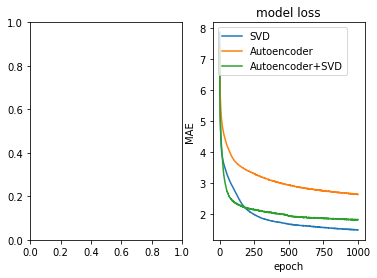

In [11]:
import matplotlib.pyplot as plt
print(history_1.history.keys())
'''
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''
# summarize history for loss
fig,ax,ax1= plt.subplots(1,2)
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.title('model loss')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['SVD', 'Autoencoder','Autoencoder+SVD'], loc='upper left')
plt.legend(['SVD', 'Autoencoder','Autoencoder+SVD'], loc='upper left')
plt.show()
fig.savefig("model_loss.png",format="png",dpi=1000)

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])


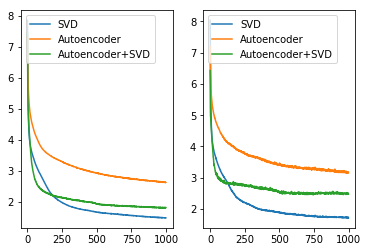

In [19]:
import matplotlib.pyplot as plt
print(history_1.history.keys())
'''
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''
# summarize history for loss
fig,(ax,ax1)= plt.subplots(1,2)
ax.plot(history_1.history['loss'])
ax.plot(history_2.history['loss'])
ax.plot(history_3.history['loss'])
#ax.ylabel('MAE')
#ax.xlabel('epoch')
ax.legend(['SVD', 'Autoencoder','Autoencoder+SVD'], loc='upper left')
ax.legend(['SVD', 'Autoencoder','Autoencoder+SVD'], loc='upper left')



ax1.plot(history_1.history['val_loss'])
ax1.plot(history_2.history['val_loss'])
ax1.plot(history_3.history['val_loss'])
#ax1.ylabel('MAE')
#ax1.xlabel('epoch')
ax1.legend(['SVD', 'Autoencoder','Autoencoder+SVD'], loc='upper left')
ax1.legend(['SVD', 'Autoencoder','Autoencoder+SVD'], loc='upper left')
#ax1.show()

fig.savefig("model_loss.pdf",format="pdf",dpi=1000)